<a href="https://colab.research.google.com/github/ajanaferreira/bootcampdataanalytics/blob/main/Projeto_Final_Squad_Previs%C3%A3o_Bullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font face="Roboto" size=5 color='black
'>**Desafio Final: Previsão de Bullying**</font>  
Bootcamp Data Analytics (2º semestre de 2024) - WoMakersCode    
Squad Dorothy Vaughan    

# **Apresentação do desafio**  


**Informações sobre o conjunto de dados**  

A Global School-Based Student Health Survey (GSHS) é uma pesquisa escolar que usa um questionário autoaplicável para obter dados sobre o comportamento de saúde dos jovens e fatores de proteção relacionados às principais causas de morbidade e mortalidade.

A pesquisa foi realizada na Argentina em 2018. Um total de 56.981 alunos participaram.

A taxa de resposta da escola foi de 86%, a taxa de resposta do aluno foi de 74% e a taxa de resposta geral foi de 63%.

&nbsp;

**I. Sobre o desenvolvimento de um modelo de previsão de bullying**  

A partir do GSHS, foram selecionadas as perguntas da pesquisa relacionadas ao bullying. Isto com o objetivo de desenvolver um modelo que permita preveni-lo.  

Alguns dos indicadores de bullying têm sido relacionados a sentimentos de solidão, falta de amigos íntimos, má comunicação com os pais, ausência nas aulas. (por exemplo, [Nansel et al. Comportamentos de bullying entre jovens americanos: Prevalência e associação com ajustamento psicossocial](https://pmc.ncbi.nlm.nih.gov/articles/PMC2435211/
)).    

Da mesma forma, jovens identificados por agressores como abaixo do peso, acima do peso e obesos foram vítimas de bullying.  

&nbsp;

**II. A base de dados disponibilizada contém as seguintes informações:**  
- record : código identificador
- Bullied_on_school_property_in_past_12_months: Sofreu bullying na propriedade da escola nos últimos 12 meses
- Bullied_not_on_school_property_in_past_12_months: sofreu bullying fora da propriedade da escola nos últimos 12_meses
- Cyber_bullied_in_past_12_months: Cyberbullying nos últimos 12 meses
- Custom_Age: Idade
- Sex: Sexo
- Physically_attacked: Ataque físico
- Physical_fighting: Briga Física
- Felt_lonely: Sentiu-se sozinho
- Close_friends: Amigos próximos
- Miss_school_no_permission: Faltam à escola sem permissão
- Other_students_kind_and_helpful: Outros alunos gentis e prestativos
- Parents_understand_problems: Os pais entendem os problemas
- Most_of_the_time_or_always_felt_lonely: Na maioria das vezes ou sempre se sentiu sozinho
- Missed_classes_or_school_without_permission: Perdeu aulas ou escola sem permissão    
- Were_underweight: Estava abaixo do peso
- Were_overweight: Estava acima do peso
- Were_obese: Estava obeso

# **Parte inicial - Preparando os dados**


## Importando as bibliotecas necessárias


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando o dataset

In [ ]:
url = 'https://drive.google.com/uc?id=1Efe6xU-mbhKYxBhrVEaepOoqlSSkDFkm'
df = pd.read_csv(url, delimiter=';')

## Visualizando a estrutura do DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

In [ ]:
df.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,


## Verificando valores únicos das colunas

In [ ]:
for coluna in df.columns:
  print(coluna)
  print(f'{df[coluna].unique()}')
  print("-" * 40)

record
[    1     2     3 ... 57093 57094 57095]
----------------------------------------
Bullied_on_school_property_in_past_12_months
['Yes' 'No' ' ']
----------------------------------------
Bullied_not_on_school_property_in_past_12_months
['Yes' 'No' ' ']
----------------------------------------
Cyber_bullied_in_past_12_months
[' ' 'No' 'Yes']
----------------------------------------
Custom_Age
['13 years old' '14 years old' '16 years old' '12 years old'
 '15 years old' '11 years old or younger' '17 years old' ' '
 '18 years old or older']
----------------------------------------
Sex
['Female' 'Male' ' ']
----------------------------------------
Physically_attacked
['0 times' '1 time' '12 or more times' '4 or 5 times' '2 or 3 times'
 '10 or 11 times' '8 or 9 times' '6 or 7 times' ' ']
----------------------------------------
Physical_fighting
['0 times' '2 or 3 times' '1 time' '4 or 5 times' '6 or 7 times'
 '8 or 9 times' '10 or 11 times' ' ' '12 or more times']
--------------------

 └── É possível perceber que foram tabuladas também as respostas em branco para todas as perguntas que fizeram parte da pesquisa. Tais valores precisarão ser tratados antes do início da análise.

&nbsp;

 🔵 **Justificativas da Squad para as próximas escolhas e ações:**

 A Squad teve acesso ao questionário original aplicado junto aos alunos na Argetina em 2018 (que originou este dataset) e verificou como funcionou a pesquisa:
- Os alunos pesquisados tinham a opção de deixar campos em branco, caso não se sentissem confortáveis em responder a pesquisa (ou seja, a resposta não era mandatória).
- Na pesquisa foi perguntado qual o peso e altura do aluno, sendo que havia ali a opção de preenchimento da opção 'Não sei' (além da pessibilidade de deixar em branco).

&nbsp;

Consultando os dados - agora processados - vemos que estas informações referentes ao peso corporal dos adolescentes, foram expressos através das variáveis `were_obese`, `were_underweight` e `were_overweight`, o que nos levou a perceber que no momento da tabulação dos resultados foi utilizado o calculo do IMC - sendo que por conta da impossibilidade de cálculo em alguns casos, tais variáveis têm os mesmos valores, quando não foi possível enquadrar o aluno pesquisado em nenhuma destas categorias.     

&nbsp;

**Diante dessas informações:**
- A Squad optou por não deletar linhas que contivessem valores em branco (eles serão substituídos por valores NaN), visto que a omissão na resposta por parte do aluno foi voluntária e pode ter sido movida por vários fatores (como retraimento, vergonha, etc).
- Tendo considerado que a base de dados, após a limpeza que virá a seguir, contará **somente com registros de pessoas que viveram efetivamente a experiência do bullying**, consideramos que todas as informações dispostas numa linha eram importantes; e que a remoção, em virtude da presença de valores NaN **representaria perda de informação**, já que nosso objetivo é mapear o contexto dos adolescentes que sofreram com este problema.
- Para a análise explorátória e descritiva que virá a seguir, nossa opção foi também pela não imputação de valores, já que isso poderia representar informações que poderiam não refletir a realidade dos fatos. (Quando chegar o momento do encoding para a correlação de Spearman e construção do Modelo de Regressão, porém, traçaremos uma outra estratégia).

## Tratamento de dados ausentes

A primeira medida aqui foi transformar espaços em branco (empty strings) em valores `NaN`.  

Primeiro foi tentando o código `df.replace('', np.nan, inplace=True)`, mas pelo fato das células conterem espaços ou outras formas de valor não vísivel, acabaram não sendo capturadas todas as strings em branco. Dessa forma, foi necessária a inclusão de uma expressão regular:



In [ ]:
# Substituição de strings vazias por valor NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,NaN,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,NaN,NaN,NaN
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,NaN,NaN,NaN
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,NaN,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,NaN,NaN,NaN


- Conferência dos valores únicos após a transformação

In [ ]:
for coluna in df.columns:
  print(coluna)
  print(f'{df[coluna].unique()}')
  print("-" * 40)

record
[    1     2     3 ... 57093 57094 57095]
----------------------------------------
Bullied_on_school_property_in_past_12_months
['Yes' 'No' nan]
----------------------------------------
Bullied_not_on_school_property_in_past_12_months
['Yes' 'No' nan]
----------------------------------------
Cyber_bullied_in_past_12_months
[nan 'No' 'Yes']
----------------------------------------
Custom_Age
['13 years old' '14 years old' '16 years old' '12 years old'
 '15 years old' '11 years old or younger' '17 years old' nan
 '18 years old or older']
----------------------------------------
Sex
['Female' 'Male' nan]
----------------------------------------
Physically_attacked
['0 times' '1 time' '12 or more times' '4 or 5 times' '2 or 3 times'
 '10 or 11 times' '8 or 9 times' '6 or 7 times' nan]
----------------------------------------
Physical_fighting
['0 times' '2 or 3 times' '1 time' '4 or 5 times' '6 or 7 times'
 '8 or 9 times' '10 or 11 times' nan '12 or more times']
--------------------

- Análise do número de valores NaN no dataset

In [ ]:
# Contagem de quantas vezes NaN aparece em cada coluna
nan_counts = df.isna().sum()
print(nan_counts.sort_values(ascending=False))

Were_obese                                          20929
Were_overweight                                     20929
Were_underweight                                    20929
Parents_understand_problems                          2373
Missed_classes_or_school_without_permission          1864
Miss_school_no_permission                            1864
Other_students_kind_and_helpful                      1559
Bullied_on_school_property_in_past_12_months         1239
Close_friends                                        1076
Cyber_bullied_in_past_12_months                       571
Sex                                                   536
Bullied_not_on_school_property_in_past_12_months      489
Felt_lonely                                           366
Most_of_the_time_or_always_felt_lonely                366
Physical_fighting                                     268
Physically_attacked                                   240
Custom_Age                                            108
record        

In [ ]:
# Cálculo da porcentagem de NaN em cada coluna
nan_percentage = df.isna().mean() * 100
print(nan_percentage.round(2).sort_values(ascending=False))

Were_obese                                          36.73
Were_overweight                                     36.73
Were_underweight                                    36.73
Parents_understand_problems                          4.16
Missed_classes_or_school_without_permission          3.27
Miss_school_no_permission                            3.27
Other_students_kind_and_helpful                      2.74
Bullied_on_school_property_in_past_12_months         2.17
Close_friends                                        1.89
Cyber_bullied_in_past_12_months                      1.00
Sex                                                  0.94
Bullied_not_on_school_property_in_past_12_months     0.86
Felt_lonely                                          0.64
Most_of_the_time_or_always_felt_lonely               0.64
Physical_fighting                                    0.47
Physically_attacked                                  0.42
Custom_Age                                           0.19
record        

- Reservando os dados do DataFrame até aqui para a 2ª parte do desafio

In [ ]:
df_encoded = df.copy()

## Seleção dos dados para a análise

Após o tratamento dos valores nulos, podemos prosseguir selecionando os dados que realmente farão parte da análise. Para isso consideramos quais eram as variáveis realmente determinantes para a análise. E dado que o assunto é bullying, consideramos que são as seguintes:

&nbsp;&nbsp;&nbsp; ◦ Bullied_on_school_property_in_past_12_months: Sofreu bullying dentro da escola  
&nbsp;&nbsp;&nbsp; ◦ Bullied_not_on_school_property_in_past_12_months: Sofreu bullying fora da escola  
&nbsp;&nbsp;&nbsp; ◦ Cyber_bullied_in_past_12_months: Sofreu cyberbullying  

- Aqui será verificada a quantidade de registros com valores NaN para estas três variáveis determinantes sobre bullying (ou seja, casos em que o aluno deixou "em aberto" o fato de ter sofrido qualquer tipo de bullying, deixando estes três campos simultaneamente em branco)

In [ ]:
# Verificação de se há linhas com o valor NaN nas três colunas simultaneamente
linhas_com_na = df[
    pd.isna(df['Bullied_on_school_property_in_past_12_months']) &
    pd.isna(df['Bullied_not_on_school_property_in_past_12_months']) &
    pd.isna(df['Cyber_bullied_in_past_12_months'])
]

total = len(df)
print(f'Número de linhas do DataFrame: {total}')

print(f'Número de linhas com valores NaN nas três variáveis determinantes: {len(linhas_com_na)}')

proporcao = (len(linhas_com_na)/total)
print(f'Representa {proporcao} do total do conjunto de dados\n')

linhas_com_na.head()

Número de linhas do DataFrame: 56981
Número de linhas com valores NaN nas três variáveis determinantes: 159
Representa 0.0027904038188167985 do total do conjunto de dados



,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
569,571,NaN,NaN,NaN,14 years old,Male,8 or 9 times,NaN,Always,NaN,6 to 9 days,Always,Sometimes,Yes,Yes,NaN,NaN,NaN
1136,1139,NaN,NaN,NaN,16 years old,NaN,NaN,NaN,Sometimes,3 or more,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
2085,2089,NaN,NaN,NaN,14 years old,Female,NaN,0 times,Sometimes,0,0 days,Rarely,Sometimes,No,No,No,No,No
2342,2346,NaN,NaN,NaN,17 years old,Female,0 times,10 or 11 times,NaN,NaN,NaN,NaN,Never,NaN,NaN,No,No,No
2381,2385,NaN,NaN,NaN,13 years old,Male,2 or 3 times,2 or 3 times,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No


└──  Linhas com valores NaN para esta situação representam 0.27% dos dados totais.

&nbsp;

 🔵 **Justificativas da Squad para as próximas escolhas e ações:**  
Entendemos que os registros acima são irrelevantes para a análise, dado que não podemos afirmar se o aluno sofreu ou não bullying, de forma que os valores das "variaveis secindárias" não conseguirão caracterizarão corretamente nenhum destes dois casos. Diante disso, estes registros serão removidos do dataset.

- Aqui acontece então a remoção destas linhas*

In [ ]:
# Verificação do número de registros antes da remoção
total_registros_antes = len(df)

# Remoção das linhas onde todas as três variáveis têm o valor NaN simultaneamente
df = df[
    ~(
        pd.isna(df['Bullied_on_school_property_in_past_12_months']) &
        pd.isna(df['Bullied_not_on_school_property_in_past_12_months']) &
        pd.isna(df['Cyber_bullied_in_past_12_months'])
    )
]

# Verificação do número de registros após a remoção
total_registros_depois = len(df)

print(f'Número de registros antes da exclusão: {total_registros_antes}')
print(f'Número de registros após a exclusão: {total_registros_depois}')
print(f'Diferença de registros excluídos: {total_registros_antes - total_registros_depois}')

Número de registros antes da exclusão: 56981
Número de registros após a exclusão: 56822
Diferença de registros excluídos: 159


In [ ]:
# Verificando as linhas removidas
removed_rows = df[(
    pd.isna(df['Bullied_on_school_property_in_past_12_months']) &
    pd.isna(df['Bullied_not_on_school_property_in_past_12_months']) &
    pd.isna(df['Cyber_bullied_in_past_12_months'])
)]

# Verificando os valores das colunas para as linhas removidas
print(removed_rows[['Bullied_on_school_property_in_past_12_months',
                    'Bullied_not_on_school_property_in_past_12_months',
                    'Cyber_bullied_in_past_12_months']])

Empty DataFrame
Columns: [Bullied_on_school_property_in_past_12_months, Bullied_not_on_school_property_in_past_12_months, Cyber_bullied_in_past_12_months]
Index: []


## ✨ (Item extra) Criação de um subset apenas com pessoas que sofreram bullying*

Aqui será criado um subgrupo chamado `df_bullying`, com  filtragem de pessoas que sofreram bullying em pelo menos uma modalidade (ou seja, serão removidos registros de pessoas que não passaram pela experiência de bullying nos últimos 12 meses).

&nbsp;

 🔵 **Justificativas da Squad para as próximas escolhas e ações:**  
Entendemos que  enfocar apenas as vítimas de bullying fará com que possamos entender melhor características que podem estar associadas a quem viveu esta experiência, explorando padrões e correlações para, ao fim da análise, gerar insights e recomendações mais eficazes.   

- Subdataset de pessoas que sofreram bullying em pelo menos uma modalidade (foca no grupo que vivenciou bullying)

In [ ]:
# Criando um subdataset apenas com pessoas que sofreram bullying
df_bullying = df[
    (df['Bullied_on_school_property_in_past_12_months'] == 'Yes') |
    (df['Bullied_not_on_school_property_in_past_12_months'] == 'Yes') |
    (df['Cyber_bullied_in_past_12_months'] == 'Yes')
]

bullying = len(df_bullying)
print(bullying)

df_bullying.head()

22812


,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,NaN,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,NaN,NaN,NaN
9,10,Yes,No,No,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No,NaN,NaN,NaN
11,12,Yes,Yes,Yes,13 years old,Female,12 or more times,1 time,Sometimes,3 or more,0 days,Never,Always,No,No,NaN,NaN,NaN
18,19,Yes,Yes,Yes,14 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Rarely,Most of the time,No,No,NaN,NaN,NaN
22,23,No,No,Yes,13 years old,Male,0 times,2 or 3 times,Most of the time,3 or more,0 days,Rarely,Always,Yes,No,No,No,No


# **Parte I - Análise dos Dados**



## Item 1
*(Enunciado do desafio 1)* &nbsp;Faça a análise exploratória dos dados categóricos, calcule a moda das variáveis e utilize recursos visuais, utilize o teste qui-quadrado para avaliar a análise de correspondência.

### 1.1. - Análise exploratória dos dados categóricos

In [ ]:
variaveis_categoricas = [
  'Bullied_on_school_property_in_past_12_months',
  'Bullied_not_on_school_property_in_past_12_months',
  'Cyber_bullied_in_past_12_months',
  'Custom_Age',
  'Sex',
  'Parents_understand_problems',
  'Close_friends',
  'Other_students_kind_and_helpful',
  'Felt_lonely',
  'Most_of_the_time_or_always_felt_lonely',
  'Miss_school_no_permission',
  'Missed_classes_or_school_without_permission',
  'Physically_attacked',
  'Physical_fighting',
  'Were_underweight',
  'Were_overweight',
  'Were_obese'
]

for column in variaveis_categoricas:
  # Contagem absoluta
  counts = df[column].value_counts(dropna=False)

  # Proporção relativa (percentual)
  proportions = df[column].value_counts(dropna=False,normalize=True) * 100

  print(f"Contagem e proporção para {column}:")
  # Exibe tanto a contagem quanto a proporção
  for value, count in counts.items():
      proportion = proportions[value]
      print(f"{value}: {count} ({proportion:.2f}%)")

  print("-" * 40)

Contagem e proporção para Bullied_on_school_property_in_past_12_months:
No: 43839 (77.15%)
Yes: 11903 (20.95%)
nan: 1080 (1.90%)
----------------------------------------
Contagem e proporção para Bullied_not_on_school_property_in_past_12_months:
No: 44263 (77.90%)
Yes: 12229 (21.52%)
nan: 330 (0.58%)
----------------------------------------
Contagem e proporção para Cyber_bullied_in_past_12_months:
No: 44213 (77.81%)
Yes: 12197 (21.47%)
nan: 412 (0.73%)
----------------------------------------
Contagem e proporção para Custom_Age:
14 years old: 12902 (22.71%)
15 years old: 12777 (22.49%)
16 years old: 11708 (20.60%)
13 years old: 10550 (18.57%)
17 years old: 8203 (14.44%)
18 years old or older: 381 (0.67%)
12 years old: 145 (0.26%)
nan: 108 (0.19%)
11 years old or younger: 48 (0.08%)
----------------------------------------
Contagem e proporção para Sex:
Female: 29300 (51.56%)
Male: 27007 (47.53%)
nan: 515 (0.91%)
----------------------------------------
Contagem e proporção para Paren

In [ ]:
variaveis_categoricas = [
  'Bullied_on_school_property_in_past_12_months',
  'Bullied_not_on_school_property_in_past_12_months',
  'Cyber_bullied_in_past_12_months',
  'Custom_Age',
  'Sex',
  'Parents_understand_problems',
  'Close_friends',
  'Other_students_kind_and_helpful',
  'Felt_lonely',
  'Most_of_the_time_or_always_felt_lonely',
  'Miss_school_no_permission',
  'Missed_classes_or_school_without_permission',
  'Physically_attacked',
  'Physical_fighting',
  'Were_underweight',
  'Were_overweight',
  'Were_obese'
]

for column in variaveis_categoricas:
  # Contagem absoluta
  counts = df[column].value_counts()

  # Proporção relativa (percentual)
  proportions = df[column].value_counts(normalize=True) * 100

  print(f"Contagem e proporção para {column}:")

  # Exibe tanto a contagem quanto a proporção
  for value, count in counts.items():
      proportion = proportions[value]
      print(f"{value}: {count} ({proportion:.2f}%)")

  print("-" * 40)

Contagem e proporção para Bullied_on_school_property_in_past_12_months:
No: 43839 (78.65%)
Yes: 11903 (21.35%)
----------------------------------------
Contagem e proporção para Bullied_not_on_school_property_in_past_12_months:
No: 44263 (78.35%)
Yes: 12229 (21.65%)
----------------------------------------
Contagem e proporção para Cyber_bullied_in_past_12_months:
No: 44213 (78.38%)
Yes: 12197 (21.62%)
----------------------------------------
Contagem e proporção para Custom_Age:
14 years old: 12902 (22.75%)
15 years old: 12777 (22.53%)
16 years old: 11708 (20.64%)
13 years old: 10550 (18.60%)
17 years old: 8203 (14.46%)
18 years old or older: 381 (0.67%)
12 years old: 145 (0.26%)
11 years old or younger: 48 (0.08%)
----------------------------------------
Contagem e proporção para Sex:
Female: 29300 (52.04%)
Male: 27007 (47.96%)
----------------------------------------
Contagem e proporção para Parents_understand_problems:
Always: 13054 (23.95%)
Never: 11930 (21.89%)
Rarely: 10443 (19

- Tabela demonstrando as frequências relativas observadas para cada modalidade de bullying

In [ ]:
# Calculando os percentuais das ocorrências de bullying
bullying_is = df['Bullied_on_school_property_in_past_12_months'].value_counts(normalize=True) * 100
bullying_os = df['Bullied_not_on_school_property_in_past_12_months'].value_counts(normalize=True) * 100
cyberbullying = df['Cyber_bullied_in_past_12_months'].value_counts(normalize=True) * 100

# Criando um DataFrame para armazenar as frequências relativas
# Fazendo um merge para juntar as tabelas e criando uma tabela final
df_fb = pd.DataFrame({
    'Bullying na escola (%)': bullying_is,
    'Bullying fora da escola (%)': bullying_os,
    'Cyberbullying (%)': cyberbullying
})

df_fb = df_fb.round(2)
# Garantindo que todas as categorias apareçam (se houver valores faltantes)
f = df.fillna(0)
df_fb

,Bullying na escola (%),Bullying fora da escola (%),Cyberbullying (%)
No,78.65,78.35,78.38
Yes,21.35,21.65,21.62


- Tabelas de contingência demonstrando a relação entre a distribuição de frequências das variáveis gênero e bullying na escola (em percentual), permitindo analisar a relação entre elas.

In [ ]:
crosstab1  = pd.crosstab(df['Sex'], df['Bullied_on_school_property_in_past_12_months'], normalize=True) * 100
crosstab1 = crosstab1.round(2)
crosstab1

Bullied_on_school_property_in_past_12_months,No,Yes
Sex,,
Female,39.85,12.23
Male,38.85,9.06


In [ ]:
crosstab2 = pd.crosstab(df['Sex'], df['Bullied_not_on_school_property_in_past_12_months'], normalize=True) * 100
crosstab2 = crosstab2.round(2)
crosstab2

Bullied_not_on_school_property_in_past_12_months,No,Yes
Sex,,
Female,39.75,12.29
Male,38.64,9.32


In [ ]:
crosstab3 = pd.crosstab(df['Sex'], df['Cyber_bullied_in_past_12_months'], normalize=True) * 100
crosstab3 = crosstab3.round(2)
crosstab3

Cyber_bullied_in_past_12_months,No,Yes
Sex,,
Female,38.01,14.08
Male,40.39,7.52


### 1.2. - Cálculo da moda
Abaixo será impresso o valor mais frequente de cada de cada variável categórica do dataset, para entendimento dos padrões mais comuns de cada variável.

In [ ]:
for column in variaveis_categoricas:
 print(f"Moda de {column}: {df[column].mode()[0]}")
 print("-" * 40)

Moda de Bullied_on_school_property_in_past_12_months: No
----------------------------------------
Moda de Bullied_not_on_school_property_in_past_12_months: No
----------------------------------------
Moda de Cyber_bullied_in_past_12_months: No
----------------------------------------
Moda de Custom_Age: 14 years old
----------------------------------------
Moda de Sex: Female
----------------------------------------
Moda de Parents_understand_problems: Always
----------------------------------------
Moda de Close_friends: 3 or more
----------------------------------------
Moda de Other_students_kind_and_helpful: Most of the time
----------------------------------------
Moda de Felt_lonely: Never
----------------------------------------
Moda de Most_of_the_time_or_always_felt_lonely: No
----------------------------------------
Moda de Miss_school_no_permission: 0 days
----------------------------------------
Moda de Missed_classes_or_school_without_permission: No
-----------------------

### 1.3. - Visualização das variáveis categóricas  
Abaixo, selecionamos algumas variáveis categóricas importantes para o entendimentos do dataset e criamos visualizações diversas - gráficos de rosca, barras, etc. - para entender melhor a distribuição de dados do dataset.  



Para visualização da frequência de cada categoria.




- Ocorrências relatadas de casos de bullying nos últimos 12 meses (por modalidade de bullying)

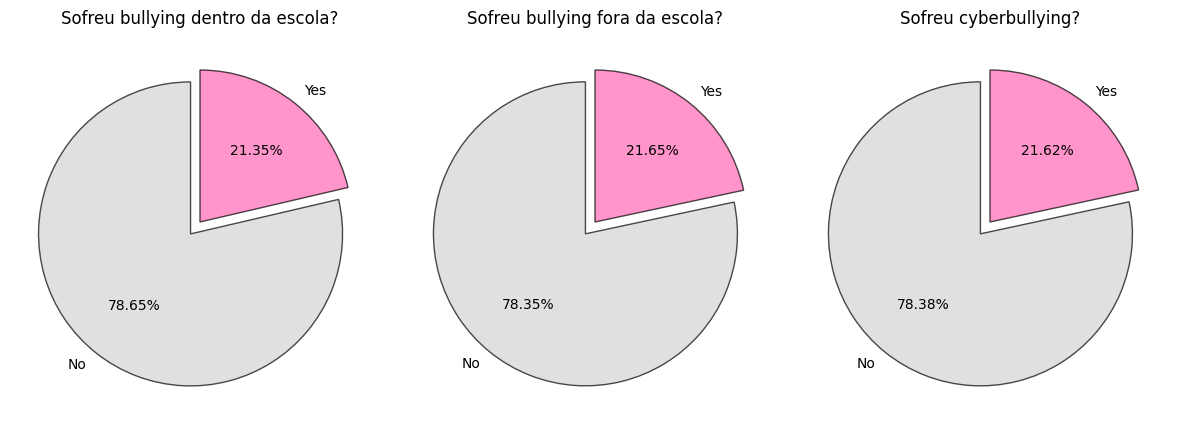

In [ ]:
# Função para criar gráficos de pizza com porcentagens e destacar a fatia
def plot_pie(ax, data, column, title):
  # Calculando a frequência relativa e convertendo para porcentagem
  counts = data[column].value_counts(normalize=True) * 100

  # Definindo as cores: rosa para "Yes" e cinza para "No"
  colors = ['#D3D3D3', '#FF69B4']

  # Explodindo a fatia "Yes" (fatia de índice 0) para destacá-la
  explode = (0.1, 0)  # A fatia "Yes" será afastada (explode[0] = 0.1)

  # Criando o gráfico de pizza
  ax.pie(counts, labels=counts.index, autopct='%1.2f%%', startangle=90, colors=colors,
         explode=explode, wedgeprops=dict(edgecolor='black',alpha=0.7))

  # Adicionando título
  ax.set_title(title)

# Definindo a figura com 1 linha e 3 colunas
fig, axes = plt.subplots(1, 3, figsize=(12, 5))  # 1 linha, 3 colunas

# Gráfico 1 - Bullying dentro da escola
plot_pie(axes[0], df, 'Bullied_on_school_property_in_past_12_months', 'Sofreu bullying dentro da escola?')

# Gráfico 2 - Bullying fora da escola
plot_pie(axes[1], df, 'Bullied_not_on_school_property_in_past_12_months', 'Sofreu bullying fora da escola?')

# Gráfico 3 - Cyberbullying
plot_pie(axes[2], df, 'Cyber_bullied_in_past_12_months', 'Sofreu cyberbullying?')

# Ajustando o layout para que os gráficos não se sobreponham
plt.tight_layout()
plt.show()

- Estudo da distribuição das demais variáveis

Distribuição para Physically_attacked:
Physically_attacked
0 times             0.829083
1 time              0.092275
2 or 3 times        0.042173
12 or more times    0.013881
4 or 5 times        0.012097
6 or 7 times        0.005245
8 or 9 times        0.003267
10 or 11 times      0.001978
Name: proportion, dtype: float64
----------------------------------------


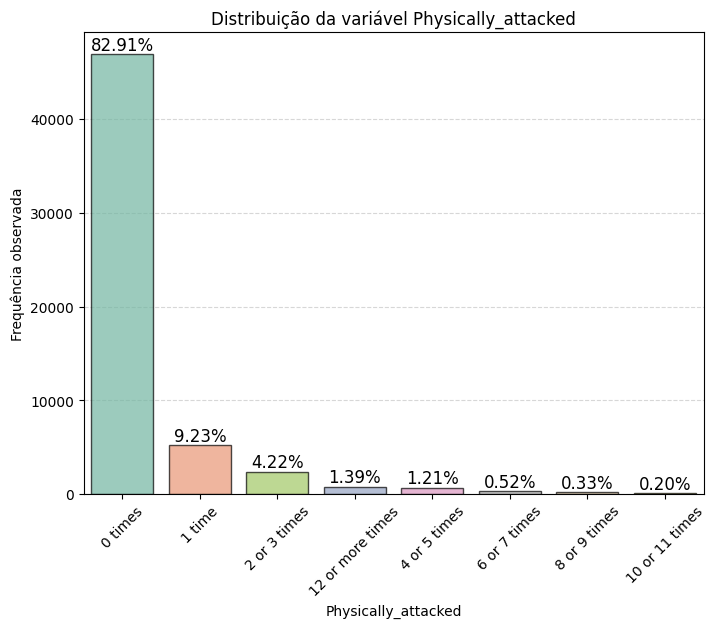

Distribuição para Sex:
Sex
Female    0.520362
Male      0.479638
Name: proportion, dtype: float64
----------------------------------------


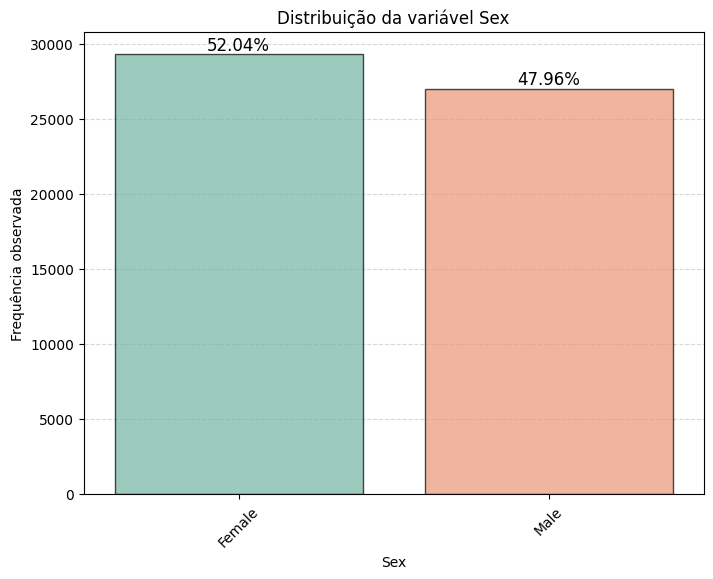

Distribuição para Felt_lonely:
Felt_lonely
Never               0.316606
Sometimes           0.259997
Rarely              0.254881
Most of the time    0.113465
Always              0.055051
Name: proportion, dtype: float64
----------------------------------------


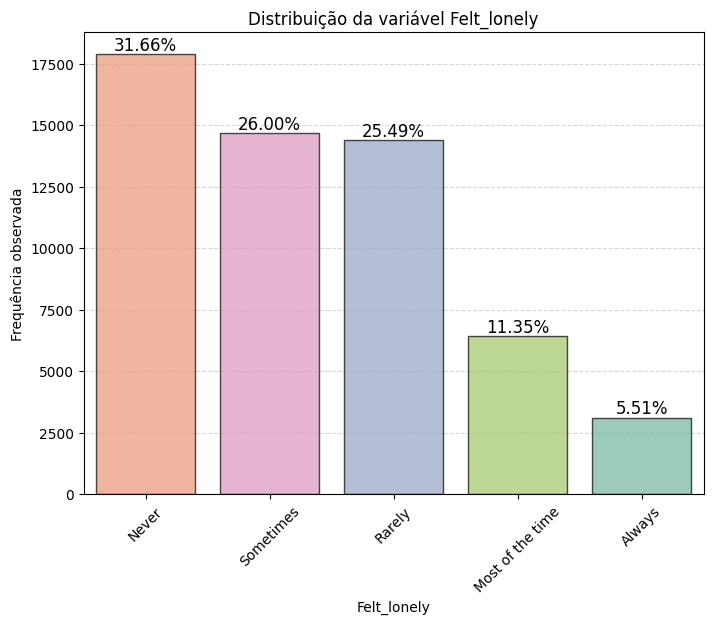

Distribuição para Close_friends:
Close_friends
3 or more    0.693142
2            0.162900
1            0.084497
0            0.059461
Name: proportion, dtype: float64
----------------------------------------


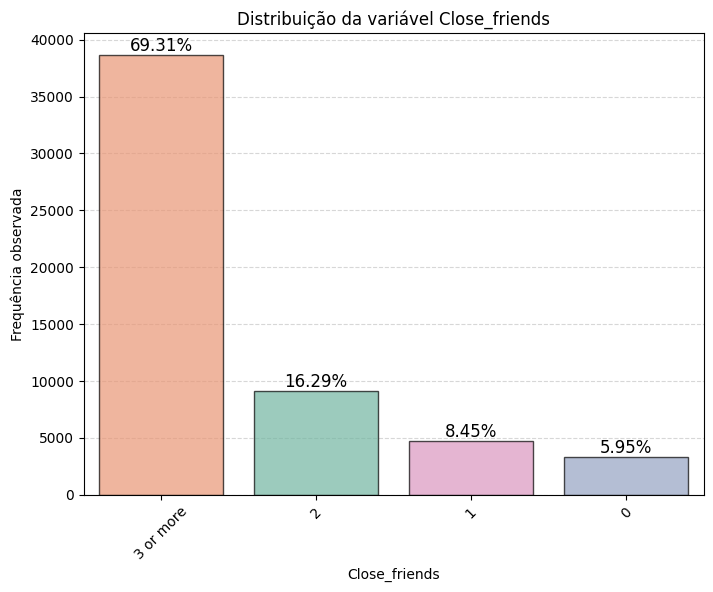

Distribuição para Other_students_kind_and_helpful:
Other_students_kind_and_helpful
Most of the time    0.285626
Sometimes           0.255393
Rarely              0.197747
Always              0.175325
Never               0.085909
Name: proportion, dtype: float64
----------------------------------------


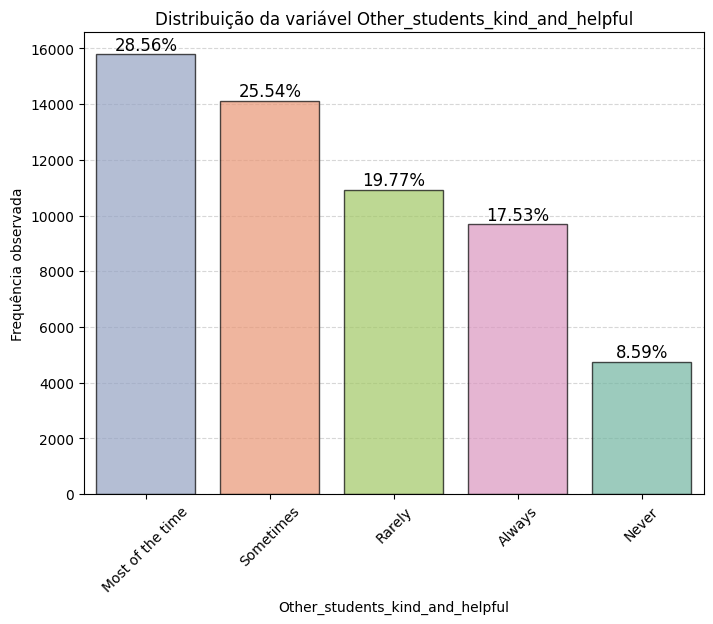

Distribuição para Parents_understand_problems:
Parents_understand_problems
Always              0.239549
Never               0.218923
Rarely              0.191636
Most of the time    0.175175
Sometimes           0.174716
Name: proportion, dtype: float64
----------------------------------------


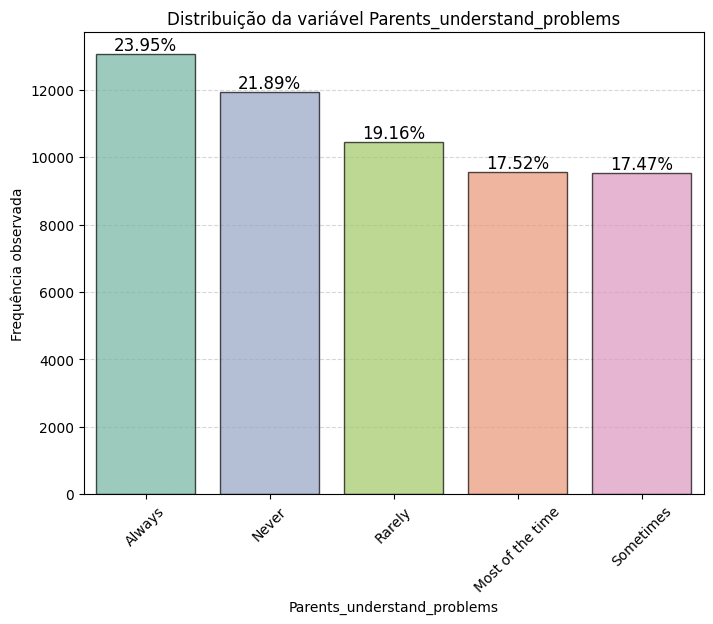

Distribuição para Miss_school_no_permission:
Miss_school_no_permission
0 days             0.701778
1 or 2 days        0.176667
3 to 5 days        0.071114
10 or more days    0.026493
6 to 9 days        0.023947
Name: proportion, dtype: float64
----------------------------------------


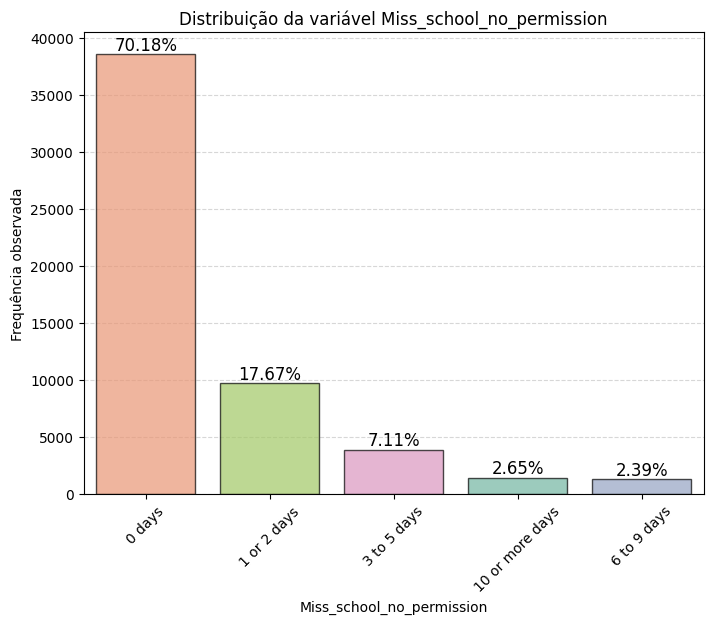

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['Physically_attacked', 'Sex', 'Felt_lonely', 'Close_friends',
                       'Other_students_kind_and_helpful', 'Parents_understand_problems',
                       'Miss_school_no_permission']

# Distribuição de frequências para variáveis categóricas
for column in categorical_columns:
    print(f"Distribuição para {column}:")
    print(df[column].value_counts(normalize=True))
    print("-" * 40)

    # Ordenar as barras pela frequência (maior para menor)
    order = df[column].value_counts().index

    # Visualização das distribuições com gráficos de barras
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df, x=column, palette='Set2', hue=column, legend=False,
                       order=order, zorder=2,edgecolor='black', alpha=0.7)
    ax.set_ylabel('Frequência observada')

    # Calcular a porcentagem para cada barra
    total = df[column].value_counts().sum()  # Total de observações para calcular a porcentagem
    for p in ax.patches:
        height = p.get_height()
        percentage = 100 * height / total  # Calcular a porcentagem
        ax.text(p.get_x() + p.get_width() / 2, height + 0.01, f'{percentage:.2f}%',
                ha='center', va='bottom', fontsize=12, color='black')  # Colocar o texto no gráfico

    plt.title(f'Distribuição da variável {column}')
    plt.xticks(rotation=45)

    # Adicionar o grid horizontal
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)

    plt.show()

- Distribuição de Ocorrências de Bullying por Modalidade e Gênero

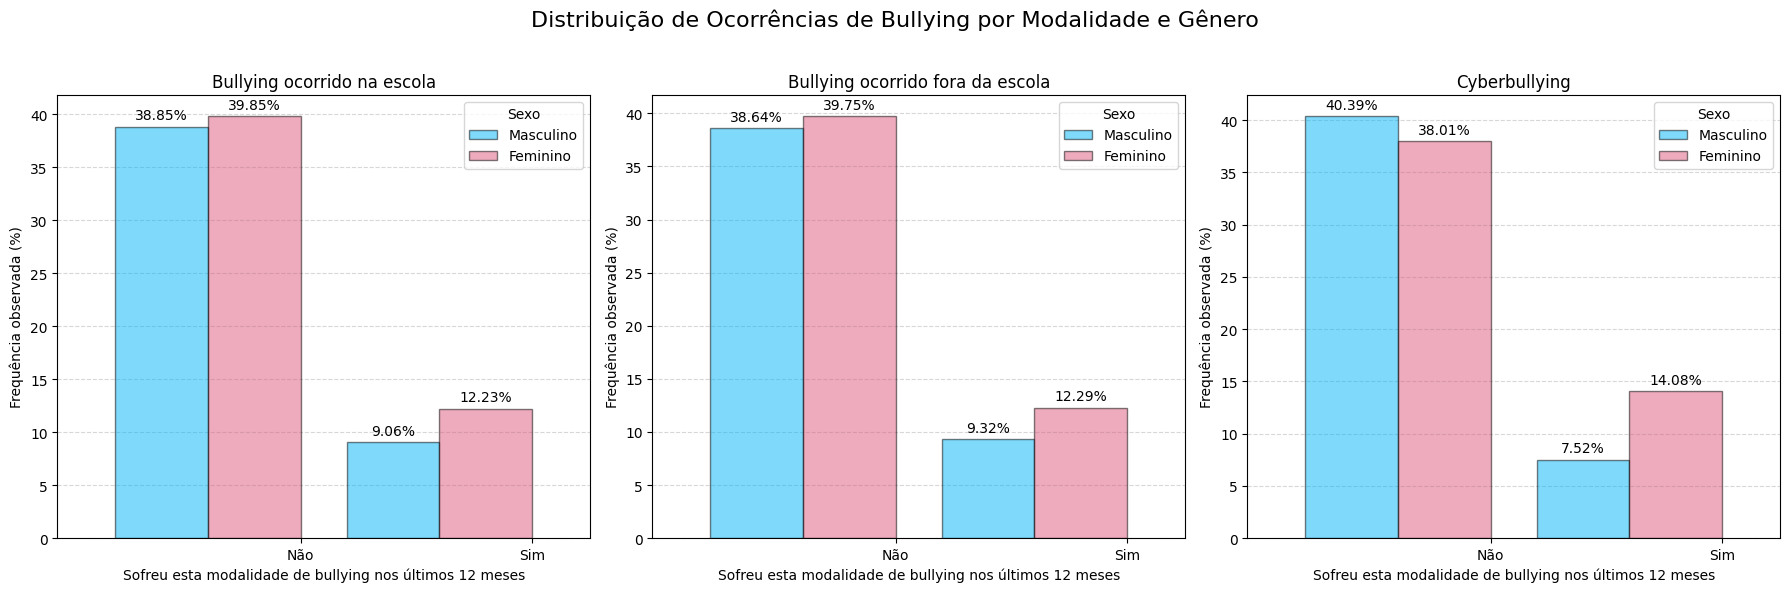

In [ ]:
# Definindo o layout para 3 gráficos (1 linha, 3 colunas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Lista de crosstabs e títulos
crosstabs = [crosstab1, crosstab2, crosstab3]
titles = ['Bullying ocorrido na escola', 'Bullying ocorrido fora da escola', 'Cyberbullying']
x_labels = ['Não', 'Sim']  # Corrigido a ordem dos rótulos

# Loop para criar os 3 gráficos
for i, ax in enumerate(axes):
    # Obtendo a crosstab para o gráfico atual
    crosstab_plot = crosstabs[i].T  # Transpor para ter as colunas 'Male' e 'Female' como legendas

    # Garantir que as barras sejam representadas como 'Male' e 'Female'
    crosstab_plot = crosstab_plot[['Male', 'Female']]  # Garantir a ordem correta das barras

    # Plotando o gráfico de barras
    bars = crosstab_plot.plot(kind='bar', ax=ax, color=['#00B5F7', '#DC587D'], zorder=2,
                              width=0.8, position=1,edgecolor='black', alpha=0.5)

    # Título e rótulos do gráfico
    ax.set_title(titles[i])
    ax.set_xlabel('Sofreu esta modalidade de bullying nos últimos 12 meses')
    ax.set_ylabel('Frequência observada (%)')

    # Adicionando grid no eixo Y
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Ajustando a posição dos ticks para que fiquem no meio das barras
    ax.set_xticks(np.arange(len(x_labels)))  # Garante que os rótulos "Não" e "Sim" fiquem no meio
    ax.set_xticklabels(x_labels, rotation=0)  # Rótulos horizontais

    # Adicionando os valores nas barras com o símbolo de porcentagem
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%', label_type='edge', padding=3)

    # Reorganizando a legenda para garantir que 'Masculino' apareça à esquerda e 'Feminino' à direita
    ax.legend(title='Sexo', labels=['Masculino', 'Feminino'], loc='upper right')

# Título geral para os três gráficos
plt.suptitle('Distribuição de Ocorrências de Bullying por Modalidade e Gênero', fontsize=16)

# Ajustando o layout para que os gráficos não sobreponham
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta para deixar espaço para o título geral

# Exibindo os gráficos
plt.show()

### 1.4. - Teste Qui-Quadrado  
Agora serão realizados testes de Qui-Quadrado para avaliar se existem relações significativas entre variáveis categóricas do dataset com as diferentes modalidades de bullying.  


In [ ]:
from scipy.stats import chi2_contingency

# Teste qui-quadrado entre a variável alvo e outras variáveis
for column in variaveis_categoricas:
  if column != 'Bullied_on_school_property_in_past_12_months':  # Excluindo a variável alvo
    contingency_table = pd.crosstab(df['Bullied_on_school_property_in_past_12_months'], df[column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Teste Qui-quadrado para {column}: p-valor = {p}")

Teste Qui-quadrado para Bullied_not_on_school_property_in_past_12_months: p-valor = 0.0
Teste Qui-quadrado para Cyber_bullied_in_past_12_months: p-valor = 0.0
Teste Qui-quadrado para Custom_Age: p-valor = 1.076443969861369e-24
Teste Qui-quadrado para Sex: p-valor = 2.4012936174787048e-39
Teste Qui-quadrado para Parents_understand_problems: p-valor = 5.8994756884761365e-62
Teste Qui-quadrado para Close_friends: p-valor = 2.8251100651996405e-53
Teste Qui-quadrado para Other_students_kind_and_helpful: p-valor = 2.54526832272844e-214
Teste Qui-quadrado para Felt_lonely: p-valor = 0.0
Teste Qui-quadrado para Most_of_the_time_or_always_felt_lonely: p-valor = 0.0
Teste Qui-quadrado para Miss_school_no_permission: p-valor = 6.19734319236822e-25
Teste Qui-quadrado para Missed_classes_or_school_without_permission: p-valor = 1.332876385805692e-23
Teste Qui-quadrado para Physically_attacked: p-valor = 0.0
Teste Qui-quadrado para Physical_fighting: p-valor = 5.058642212519891e-45
Teste Qui-quadrado

In [ ]:
# Teste qui-quadrado entre a variável alvo e outras variáveis
for column in variaveis_categoricas:
    if column != 'Bullied_not_on_school_property_in_past_12_months':  # Excluindo a variável alvo
        contingency_table = pd.crosstab(df['Bullied_not_on_school_property_in_past_12_months'], df[column])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Verificando se o p-valor é menor que 0.05 (significativo)
        if p < 0.05:
            print(f"Variável significativa: {column} (p-valor = {p:.4f})")
        else:
            print(f"Variável não significativa: {column} (p-valor = {p:.4f})")

Variável significativa: Bullied_on_school_property_in_past_12_months (p-valor = 0.0000)
Variável significativa: Cyber_bullied_in_past_12_months (p-valor = 0.0000)
Variável significativa: Custom_Age (p-valor = 0.0000)
Variável significativa: Sex (p-valor = 0.0000)
Variável significativa: Parents_understand_problems (p-valor = 0.0000)
Variável significativa: Close_friends (p-valor = 0.0000)
Variável significativa: Other_students_kind_and_helpful (p-valor = 0.0000)
Variável significativa: Felt_lonely (p-valor = 0.0000)
Variável significativa: Most_of_the_time_or_always_felt_lonely (p-valor = 0.0000)
Variável significativa: Miss_school_no_permission (p-valor = 0.0000)
Variável significativa: Missed_classes_or_school_without_permission (p-valor = 0.0000)
Variável significativa: Physically_attacked (p-valor = 0.0000)
Variável significativa: Physical_fighting (p-valor = 0.0000)
Variável não significativa: Were_underweight (p-valor = 0.8308)
Variável não significativa: Were_overweight (p-valor

In [ ]:
# Teste qui-quadrado entre a variável alvo e outras variáveis
for column in variaveis_categoricas:
    if column != 'Cyber_bullied_in_past_12_months':  # Excluindo a variável alvo
        contingency_table = pd.crosstab(df['Cyber_bullied_in_past_12_months'], df[column])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Verificando se o p-valor é menor que 0.05 (significativo)
        if p < 0.05:
            print(f"Variável significativa: {column} (p-valor = {p:.4f})")
        else:
            print(f"Variável não significativa: {column} (p-valor = {p:.4f})")

Variável significativa: Bullied_on_school_property_in_past_12_months (p-valor = 0.0000)
Variável significativa: Bullied_not_on_school_property_in_past_12_months (p-valor = 0.0000)
Variável significativa: Custom_Age (p-valor = 0.0000)
Variável significativa: Sex (p-valor = 0.0000)
Variável significativa: Parents_understand_problems (p-valor = 0.0000)
Variável significativa: Close_friends (p-valor = 0.0000)
Variável significativa: Other_students_kind_and_helpful (p-valor = 0.0000)
Variável significativa: Felt_lonely (p-valor = 0.0000)
Variável significativa: Most_of_the_time_or_always_felt_lonely (p-valor = 0.0000)
Variável significativa: Miss_school_no_permission (p-valor = 0.0000)
Variável significativa: Missed_classes_or_school_without_permission (p-valor = 0.0000)
Variável significativa: Physically_attacked (p-valor = 0.0000)
Variável significativa: Physical_fighting (p-valor = 0.0000)
Variável não significativa: Were_underweight (p-valor = 0.4335)
Variável significativa: Were_overwe

└── Interpretação do teste Qui-Quadrado: O valor p que resultou dos testes acima, indica se existe (ou não) uma dependência estatística entre a variável bullying sofrido na escola com cada uma das demais variáveis do dataset.   

Sempre que o valor p for menor que 0.05, isso indica que podemos rejeitar a hipótese nula de independência entre as variáveis. Ou, em outras palavras, podemos concluir que há sim, uma associação significativa entre as duas variáveis analisadas.


### ✨ (Item extra) - Implementando análises apenas para o subdataset composto por pessoas que sofreram bullying

In [ ]:
variaveis_categoricas = [
  'Bullied_on_school_property_in_past_12_months',
  'Bullied_not_on_school_property_in_past_12_months',
  'Cyber_bullied_in_past_12_months',
  'Custom_Age',
  'Sex',
  'Parents_understand_problems',
  'Close_friends',
  'Other_students_kind_and_helpful',
  'Felt_lonely',
  'Most_of_the_time_or_always_felt_lonely',
  'Miss_school_no_permission',
  'Missed_classes_or_school_without_permission',
  'Physically_attacked',
  'Physical_fighting',
  'Were_underweight',
  'Were_overweight',
  'Were_obese'
]

for column in variaveis_categoricas:
  # Contagem absoluta
  counts = df_bullying[column].value_counts()

  # Proporção relativa (percentual)
  proportions = df_bullying[column].value_counts(normalize=True) * 100

  print(f"Contagem e proporção para {column}:")

  # Exibe tanto a contagem quanto a proporção
  for value, count in counts.items():
      proportion = proportions[value]
      print(f"{value}: {count} ({proportion:.2f}%)")

  print("-" * 40)

Contagem e proporção para Bullied_on_school_property_in_past_12_months:
Yes: 11903 (53.18%)
No: 10478 (46.82%)
----------------------------------------
Contagem e proporção para Bullied_not_on_school_property_in_past_12_months:
Yes: 12229 (53.94%)
No: 10444 (46.06%)
----------------------------------------
Contagem e proporção para Cyber_bullied_in_past_12_months:
Yes: 12197 (53.90%)
No: 10430 (46.10%)
----------------------------------------
Contagem e proporção para Custom_Age:
15 years old: 5258 (23.09%)
14 years old: 5169 (22.70%)
16 years old: 4780 (20.99%)
13 years old: 4063 (17.85%)
17 years old: 3275 (14.38%)
18 years old or older: 143 (0.63%)
12 years old: 56 (0.25%)
11 years old or younger: 24 (0.11%)
----------------------------------------
Contagem e proporção para Sex:
Female: 13137 (58.19%)
Male: 9440 (41.81%)
----------------------------------------
Contagem e proporção para Parents_understand_problems:
Never: 5454 (24.92%)
Rarely: 4792 (21.89%)
Always: 4097 (18.72%)
Som

In [ ]:
for column in variaveis_categoricas:
 print(f"Moda de {column}: {df_bullying[column].mode()[0]}")
 print("-" * 40)

Moda de Bullied_on_school_property_in_past_12_months: Yes
----------------------------------------
Moda de Bullied_not_on_school_property_in_past_12_months: Yes
----------------------------------------
Moda de Cyber_bullied_in_past_12_months: Yes
----------------------------------------
Moda de Custom_Age: 15 years old
----------------------------------------
Moda de Sex: Female
----------------------------------------
Moda de Parents_understand_problems: Never
----------------------------------------
Moda de Close_friends: 3 or more
----------------------------------------
Moda de Other_students_kind_and_helpful: Sometimes
----------------------------------------
Moda de Felt_lonely: Sometimes
----------------------------------------
Moda de Most_of_the_time_or_always_felt_lonely: No
----------------------------------------
Moda de Miss_school_no_permission: 0 days
----------------------------------------
Moda de Missed_classes_or_school_without_permission: No
------------------------

Distribuição para Custom_Age:
Custom_Age
15 years old               0.230938
14 years old               0.227029
16 years old               0.209944
13 years old               0.178452
17 years old               0.143842
18 years old or older      0.006281
12 years old               0.002460
11 years old or younger    0.001054
Name: proportion, dtype: float64
----------------------------------------


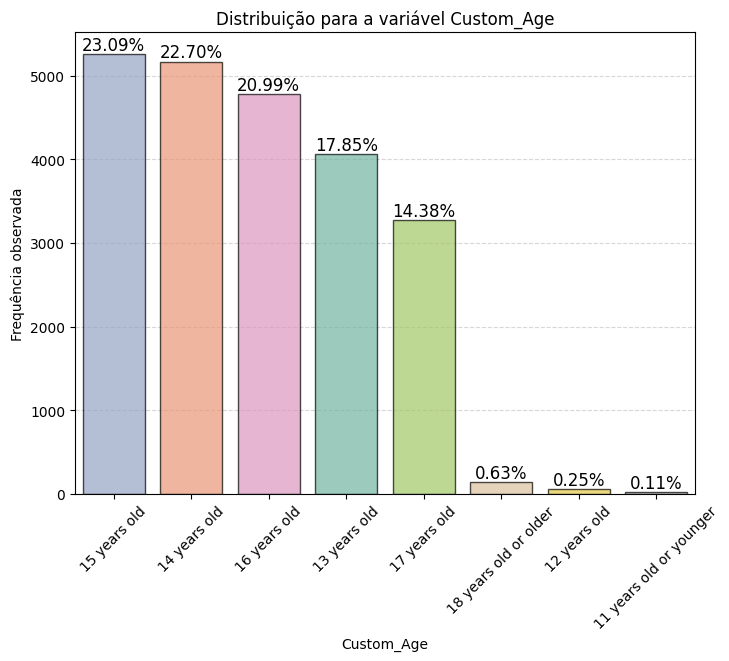

Distribuição para Sex:
Sex
Female    0.581875
Male      0.418125
Name: proportion, dtype: float64
----------------------------------------


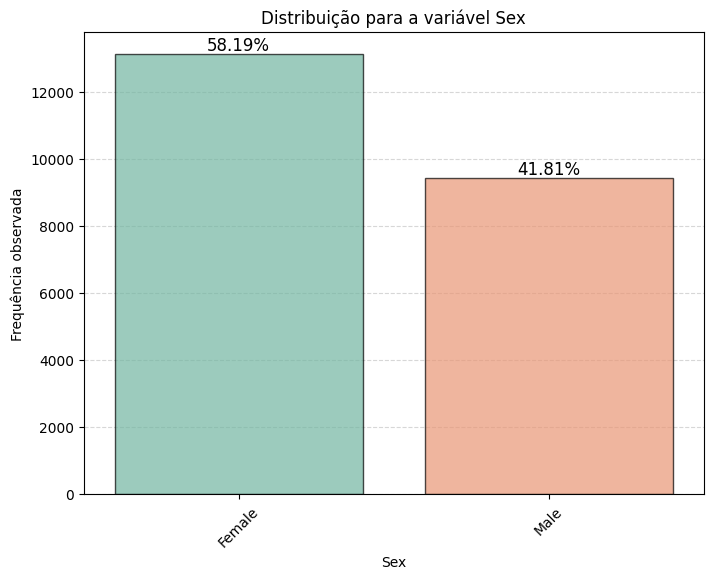

Distribuição para Parents_understand_problems:
Parents_understand_problems
Never               0.249166
Rarely              0.218923
Always              0.187172
Sometimes           0.182832
Most of the time    0.161908
Name: proportion, dtype: float64
----------------------------------------


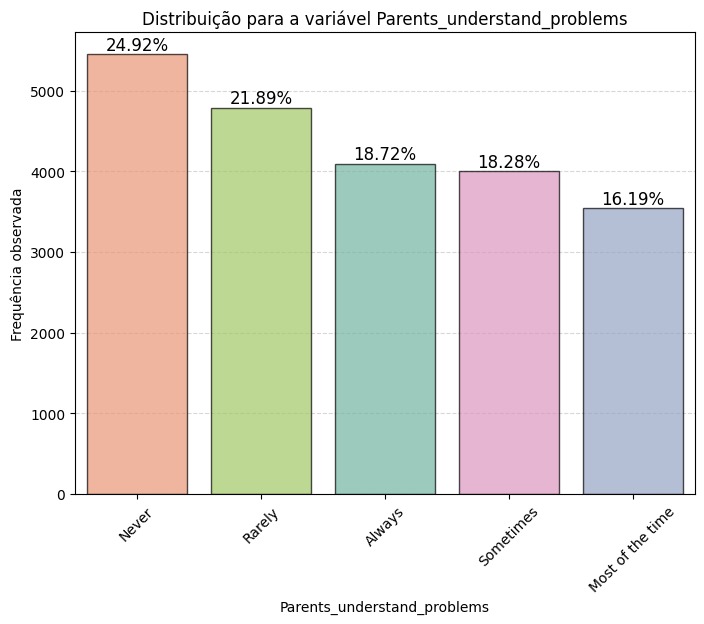

Distribuição para Close_friends:
Close_friends
3 or more    0.653025
2            0.180898
1            0.098061
0            0.068016
Name: proportion, dtype: float64
----------------------------------------


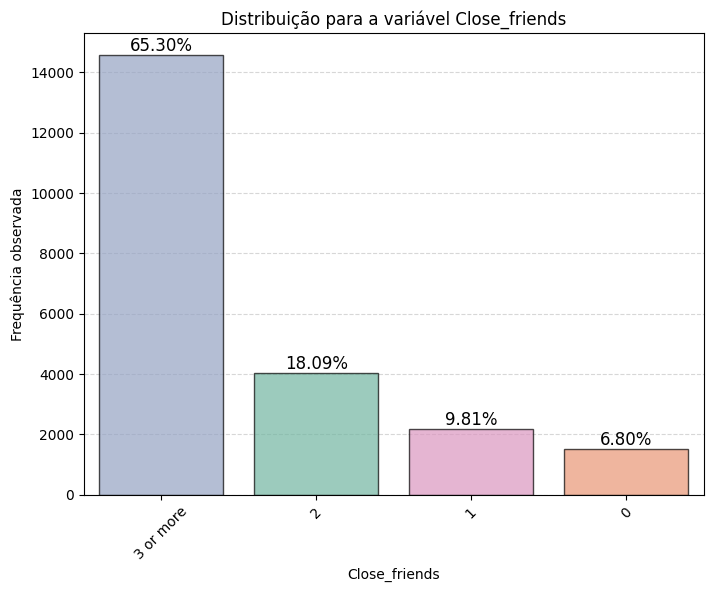

Distribuição para Other_students_kind_and_helpful:
Other_students_kind_and_helpful
Sometimes           0.268669
Most of the time    0.259199
Rarely              0.239809
Always              0.130501
Never               0.101822
Name: proportion, dtype: float64
----------------------------------------


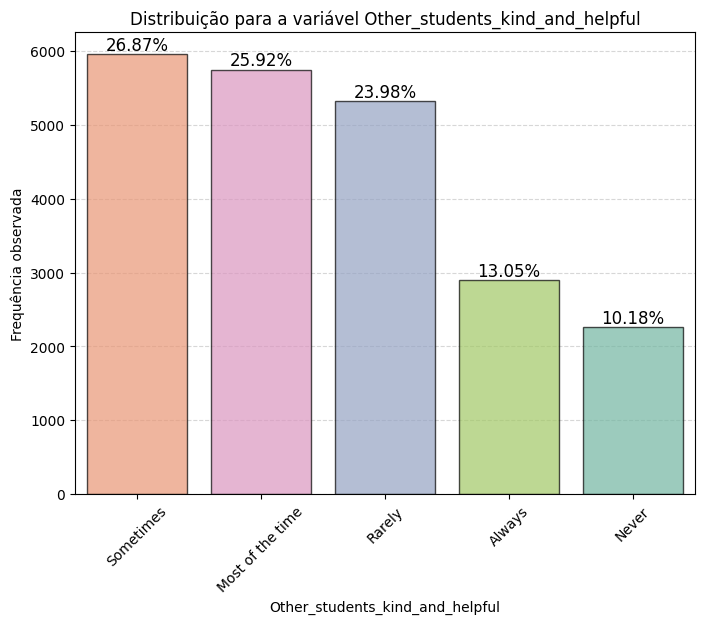

Distribuição para Felt_lonely:
Felt_lonely
Sometimes           0.308986
Rarely              0.227822
Never               0.198429
Most of the time    0.174552
Always              0.090211
Name: proportion, dtype: float64
----------------------------------------


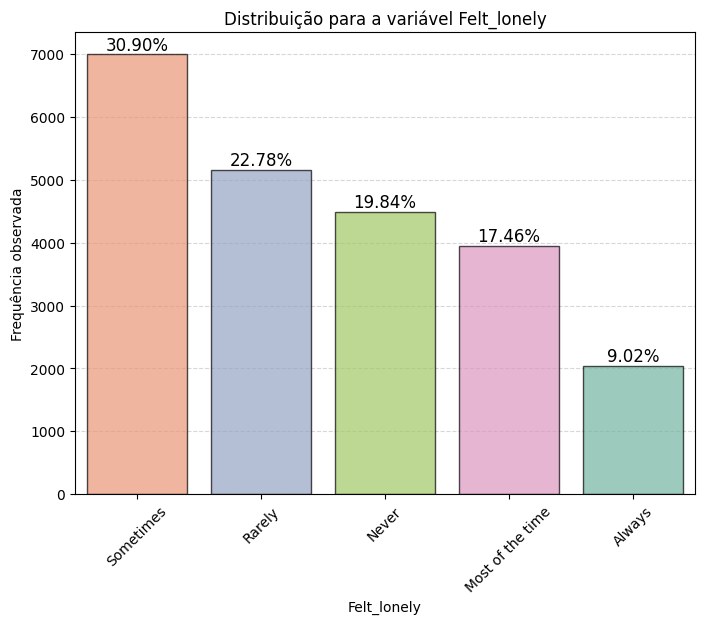

Distribuição para Most_of_the_time_or_always_felt_lonely:
Most_of_the_time_or_always_felt_lonely
No     0.735237
Yes    0.264763
Name: proportion, dtype: float64
----------------------------------------


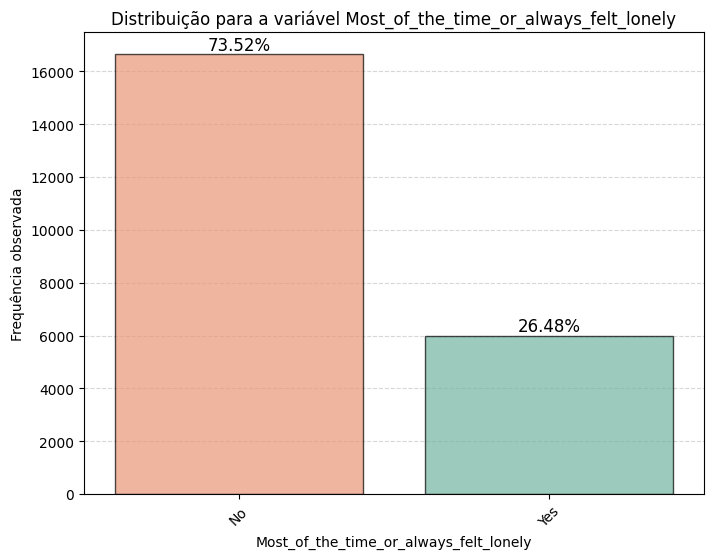

Distribuição para Miss_school_no_permission:
Miss_school_no_permission
0 days             0.655067
1 or 2 days        0.196188
3 to 5 days        0.085972
10 or more days    0.033479
6 to 9 days        0.029294
Name: proportion, dtype: float64
----------------------------------------


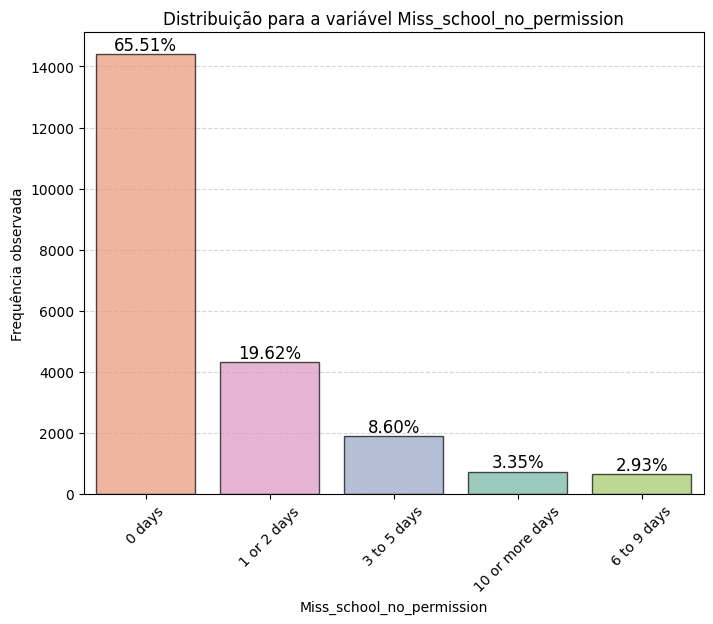

Distribuição para Missed_classes_or_school_without_permission:
Missed_classes_or_school_without_permission
No     0.655067
Yes    0.344933
Name: proportion, dtype: float64
----------------------------------------


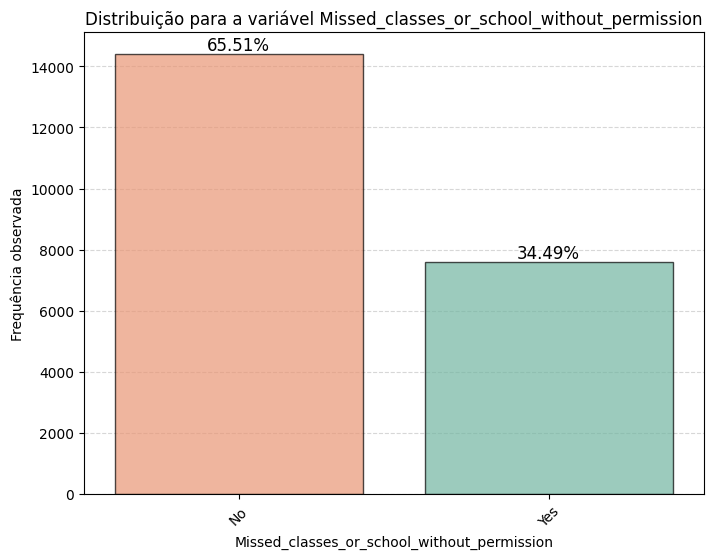

Distribuição para Physically_attacked:
Physically_attacked
0 times             0.724569
1 time              0.138464
2 or 3 times        0.072206
12 or more times    0.024539
4 or 5 times        0.021102
6 or 7 times        0.008767
8 or 9 times        0.006256
10 or 11 times      0.004097
Name: proportion, dtype: float64
----------------------------------------


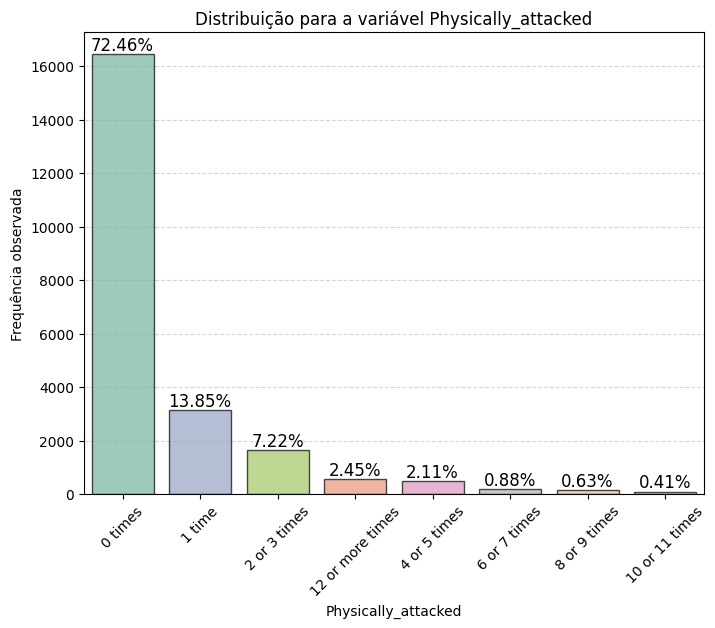

Distribuição para Physical_fighting:
Physical_fighting
0 times             0.699899
1 time              0.152297
2 or 3 times        0.083440
4 or 5 times        0.022424
12 or more times    0.021587
6 or 7 times        0.010573
8 or 9 times        0.005639
10 or 11 times      0.004141
Name: proportion, dtype: float64
----------------------------------------


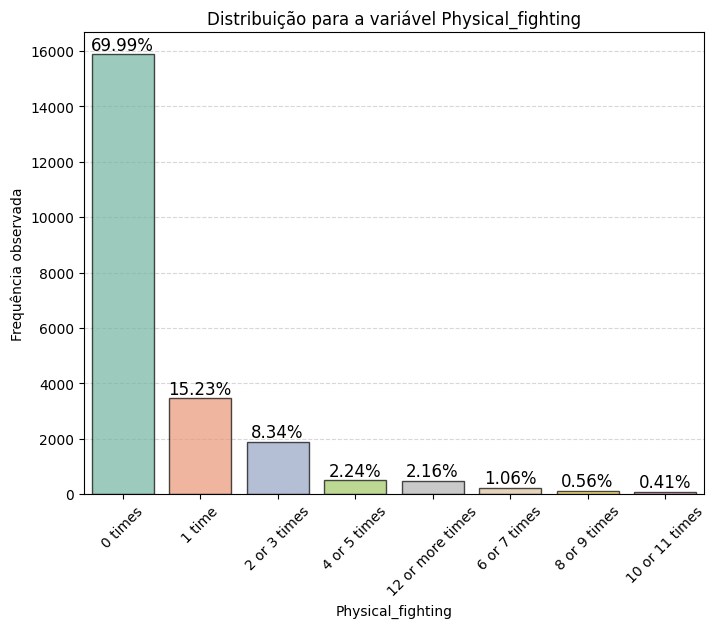

Distribuição para Were_underweight:
Were_underweight
No     0.979584
Yes    0.020416
Name: proportion, dtype: float64
----------------------------------------


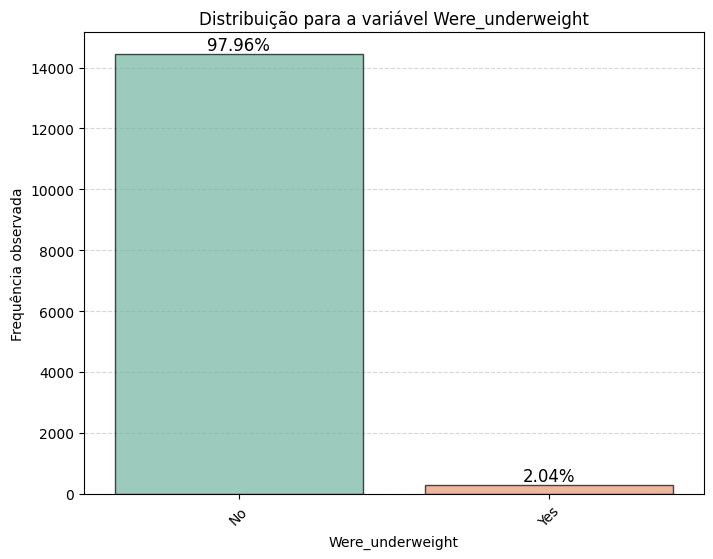

Distribuição para Were_overweight:
Were_overweight
No     0.704606
Yes    0.295394
Name: proportion, dtype: float64
----------------------------------------


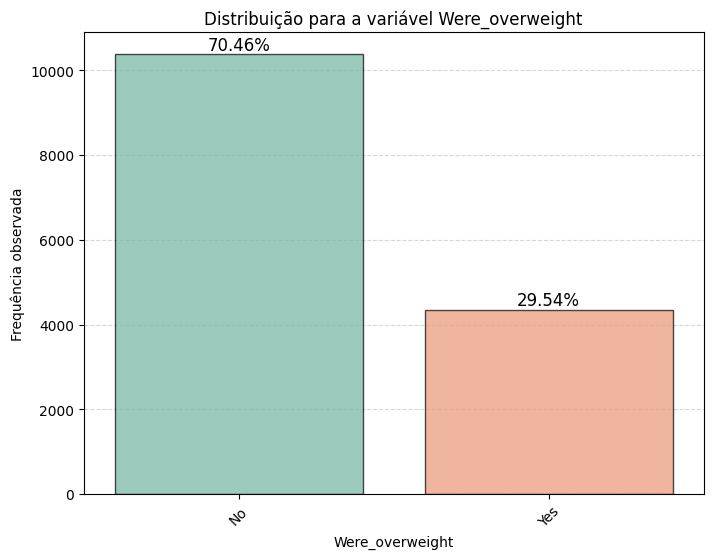

Distribuição para Were_obese:
Were_obese
No     0.927627
Yes    0.072373
Name: proportion, dtype: float64
----------------------------------------


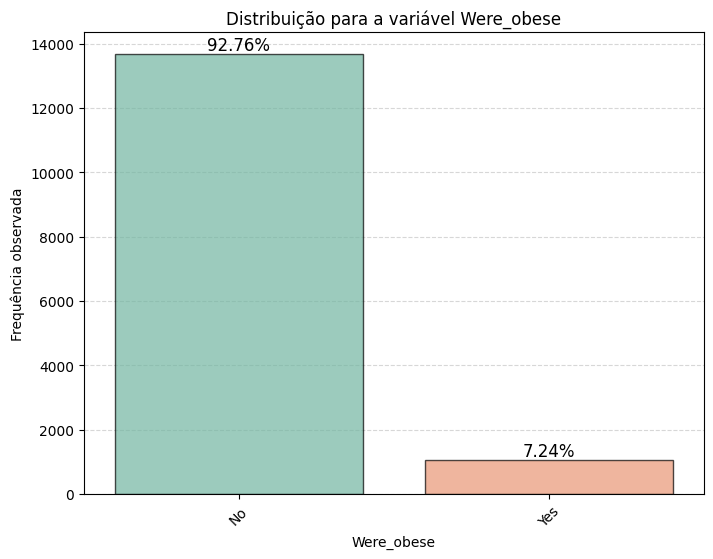

In [ ]:
variaveis_categoricas_selecionadas = [
  'Custom_Age',
  'Sex',
  'Parents_understand_problems',
  'Close_friends',
  'Other_students_kind_and_helpful',
  'Felt_lonely',
  'Most_of_the_time_or_always_felt_lonely',
  'Miss_school_no_permission',
  'Missed_classes_or_school_without_permission',
  'Physically_attacked',
  'Physical_fighting',
  'Were_underweight',
  'Were_overweight',
  'Were_obese'
]

# Distribuição de frequências para variáveis categóricas
for column in variaveis_categoricas_selecionadas:
    print(f"Distribuição para {column}:")
    print(df_bullying[column].value_counts(normalize=True))
    print("-" * 40)

    # Ordenar as barras pela frequência (maior para menor)
    order = df_bullying[column].value_counts().index

    # Visualização das distribuições com gráficos de barras
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df_bullying, x=column, palette='Set2', hue=column, legend=False,
                       zorder=2, order=order,edgecolor='black', alpha=0.7)
    ax.set_ylabel('Frequência observada')

    # Calcular a porcentagem para cada barra
    total = df_bullying[column].value_counts().sum()  # Total de observações para calcular a porcentagem
    for p in ax.patches:
        height = p.get_height()
        percentage = 100 * height / total  # Calcular a porcentagem
        ax.text(p.get_x() + p.get_width() / 2, height + 0.01, f'{percentage:.2f}%',
                ha='center', va='bottom', fontsize=12, color='black')  # Colocar o texto no gráfico

    plt.title(f'Distribuição para a variável {column}')
    plt.xticks(rotation=45)

    # Adicionar o grid horizontal
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)

    plt.show()

- Distribuição de idade de alunos que sofreram bullying

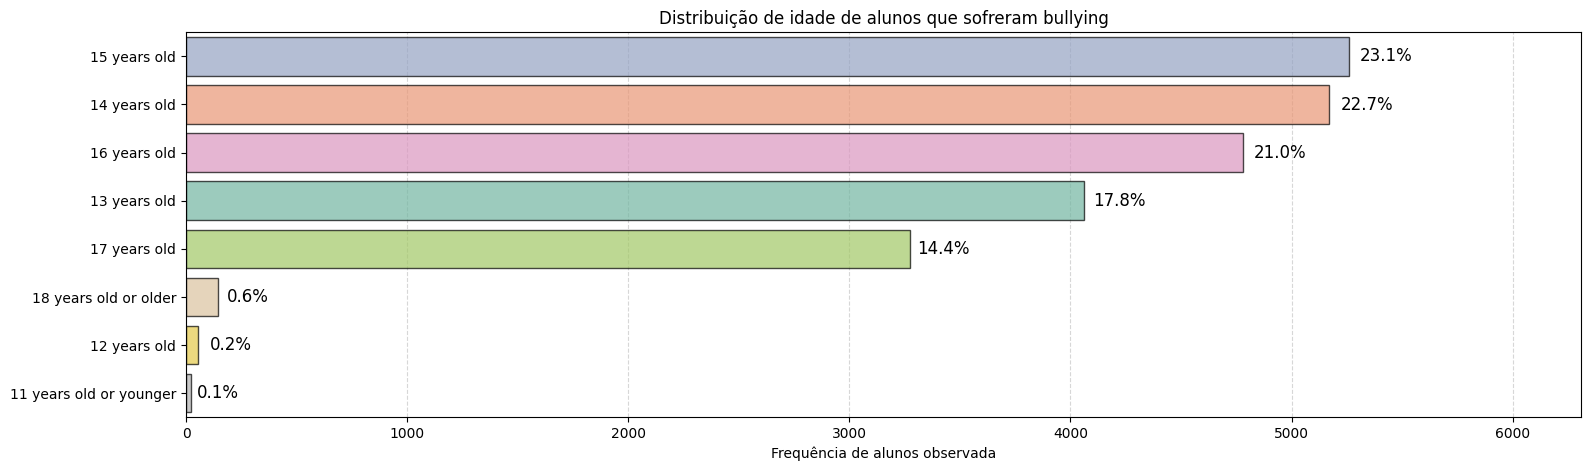

In [ ]:
# Calcular as contagens das idades e as porcentagens
age_counts = df_bullying['Custom_Age'].value_counts().sort_values(ascending=False)

# Criar o countplot com as barras ordenadas
plt.figure(figsize=(18, 5))
ax = sns.countplot(y=df_bullying['Custom_Age'],
                   order=age_counts.index,
                   palette='Set2',
                   hue=df_bullying['Custom_Age'],
                   zorder=2,  # Zorder para as barras
                   edgecolor='black', alpha=0.7,
                   legend=False)

# Adicionar título e labels
plt.title("Distribuição de idade de alunos que sofreram bullying")
plt.xlabel("Frequência de alunos observada")
plt.ylabel("")

# Adicionar grid nas barras horizontais
plt.grid(True, axis='x', linestyle='--', alpha=0.5, zorder=0)

# Aumentar o limite do eixo X para garantir que as anotações não fiquem cortadas
plt.xlim(0, age_counts.max() * 1.2)  # Ampliar o limite direito para 20% a mais

# Adicionar as porcentagens nas barras com espaçamento
for p in ax.patches:
    width = p.get_width()  # A largura da barra
    percentage = (width / age_counts.sum()) * 100  # Calcular a porcentagem

    # Posição original da anotação
    x = p.get_x() + p.get_width()  # Posição à direita da barra
    y = p.get_y() + p.get_height() / 2  # Posicionar verticalmente no centro da barra

   # Ajuste do deslocamento
    if width > 200:  # Se a barra for larga, usa o deslocamento normal
      ax.text(x + width * 0.010, y, f'{percentage:.1f}%', va='center', ha='left', fontsize=12)
    elif 130 <= width <= 200:  # Se a barra for larga, usa o deslocamento normal
      ax.text(x + width * 0.30, y, f'{percentage:.1f}%', va='center', ha='left', fontsize=12)
    else:  # Se a barra for pequena, ajusta o deslocamento para evitar sobreposição
      ax.text(x + width * 0.95, y, f'{percentage:.1f}%', va='center', ha='left', fontsize=12)

# Exibir o gráfico
plt.show()

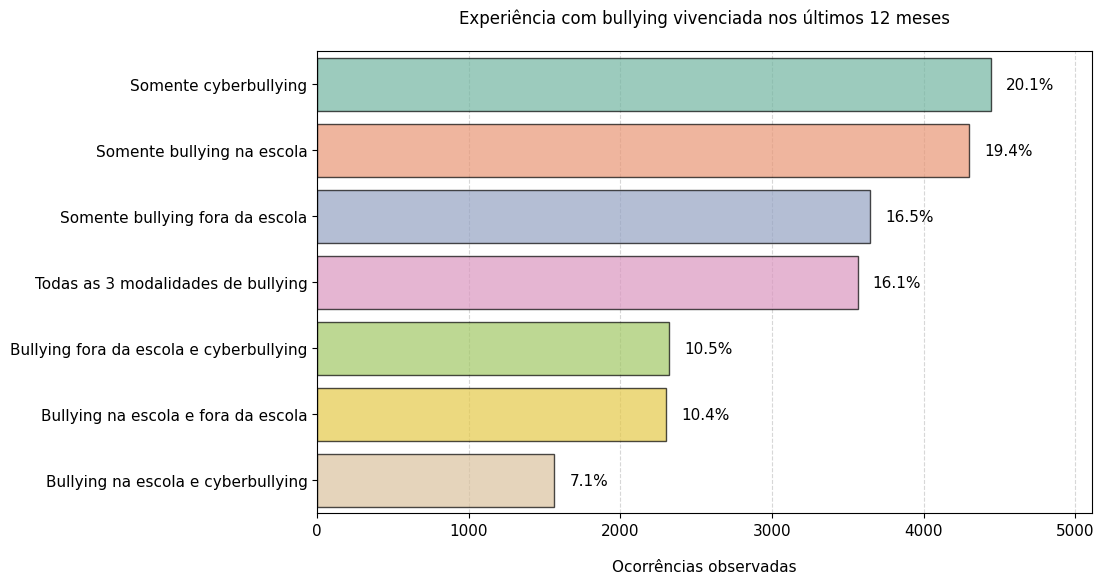

In [ ]:
# Definindo as categorias de combinações de bullying conforme sua descrição
conditions = {
    'Somente bullying na escola': (
        (df_bullying['Bullied_on_school_property_in_past_12_months'] == 'Yes') &
        (df_bullying['Bullied_not_on_school_property_in_past_12_months'].isin(['No', 'NaN'])) &
        (df_bullying['Cyber_bullied_in_past_12_months'].isin(['No', 'NaN']))
    ),
    'Somente bullying fora da escola': (
        (df_bullying['Bullied_not_on_school_property_in_past_12_months'] == 'Yes') &
        (df_bullying['Bullied_on_school_property_in_past_12_months'].isin(['No', 'NaN'])) &
        (df_bullying['Cyber_bullied_in_past_12_months'].isin(['No', 'NaN']))
    ),
    'Somente cyberbullying': (
        (df_bullying['Cyber_bullied_in_past_12_months'] == 'Yes') &
        (df_bullying['Bullied_on_school_property_in_past_12_months'].isin(['No', 'NaN'])) &
        (df_bullying['Bullied_not_on_school_property_in_past_12_months'].isin(['No', 'NaN']))
    ),
    'Bullying na escola e cyberbullying': (
        (df_bullying['Bullied_on_school_property_in_past_12_months'] == 'Yes') &
        (df_bullying['Cyber_bullied_in_past_12_months'] == 'Yes') &
        (df_bullying['Bullied_not_on_school_property_in_past_12_months'].isin(['No', 'NaN']))
    ),
    'Bullying na escola e fora da escola': (
        (df_bullying['Bullied_on_school_property_in_past_12_months'] == 'Yes') &
        (df_bullying['Bullied_not_on_school_property_in_past_12_months'] == 'Yes') &
        (df_bullying['Cyber_bullied_in_past_12_months'].isin(['No', 'NaN']))
    ),
    'Bullying fora da escola e cyberbullying': (
        (df_bullying['Bullied_not_on_school_property_in_past_12_months'] == 'Yes') &
        (df_bullying['Cyber_bullied_in_past_12_months'] == 'Yes') &
        (df_bullying['Bullied_on_school_property_in_past_12_months'].isin(['No', 'NaN']))
    ),
    'Todas as 3 modalidades de bullying': (
        (df_bullying['Bullied_on_school_property_in_past_12_months'] == 'Yes') &
        (df_bullying['Bullied_not_on_school_property_in_past_12_months'] == 'Yes') &
        (df_bullying['Cyber_bullied_in_past_12_months'] == 'Yes')
    ),
}

# Contando o número de pessoas em cada categoria
counts = {category: (condition).sum() for category, condition in conditions.items()}

# Convertendo para um DataFrame para facilitar a visualização e gráfico
count_df = pd.DataFrame(list(counts.items()), columns=['Categoria', 'Número de Pessoas'])

# Calculando a porcentagem
count_df['Porcentagem'] = (count_df['Número de Pessoas'] / count_df['Número de Pessoas'].sum()) * 100

# Ordenando de maior para menor
count_df = count_df.sort_values(by='Número de Pessoas', ascending=False)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
sns.barplot(x='Número de Pessoas', y='Categoria', data=count_df, palette='Set2', hue='Categoria', edgecolor='black',
            zorder=2, alpha=0.7, legend=False)

# Adicionando título e rótulos aos eixos
plt.title('Experiência com bullying vivenciada nos últimos 12 meses', fontsize=12, pad=20)
plt.xlabel('Ocorrências observadas', fontsize=11, labelpad=15)

# Adicionando o grid somente na direção vertical (no eixo X)
plt.grid(True, axis='x', linestyle='--', alpha=0.5, zorder=0)

# Removendo o rótulo do eixo Y
plt.ylabel('')

# Adicionando os valores percentuais nas barras
for index, value in enumerate(count_df['Número de Pessoas']):
    plt.text(value + 100, index, f'{count_df["Porcentagem"].iloc[index]:.1f}%', va='center', fontsize=11)

# Ajustando o limite do eixo x para adicionar mais espaço à direita
plt.xlim(0, count_df['Número de Pessoas'].max() * 1.15)

# Aumentando o tamanho dos ticks dos eixos
plt.xticks(fontsize=11)  # Ticks do eixo X
plt.yticks(fontsize=11)  # Ticks do eixo Y

# Exibindo o gráfico
plt.show()

## Item 2
*(Enunciado do desafio 2)* &nbsp;Plote histogramas e boxplots para cada tipo de bullying separado por gênero e idade.

### 2.1. - Histogramas para tipos de bullying por gênero e idade

Como se tratam especificamente de variáveis categóricas (e histogramas servem para variáveis contínuas ou valores em intervalos), vamos usar o gráfico de barras para entender melhor a distribuição das variáveis de modalidade de bullying em relação a gênero e idade.

- Tipos de bullying por gênero

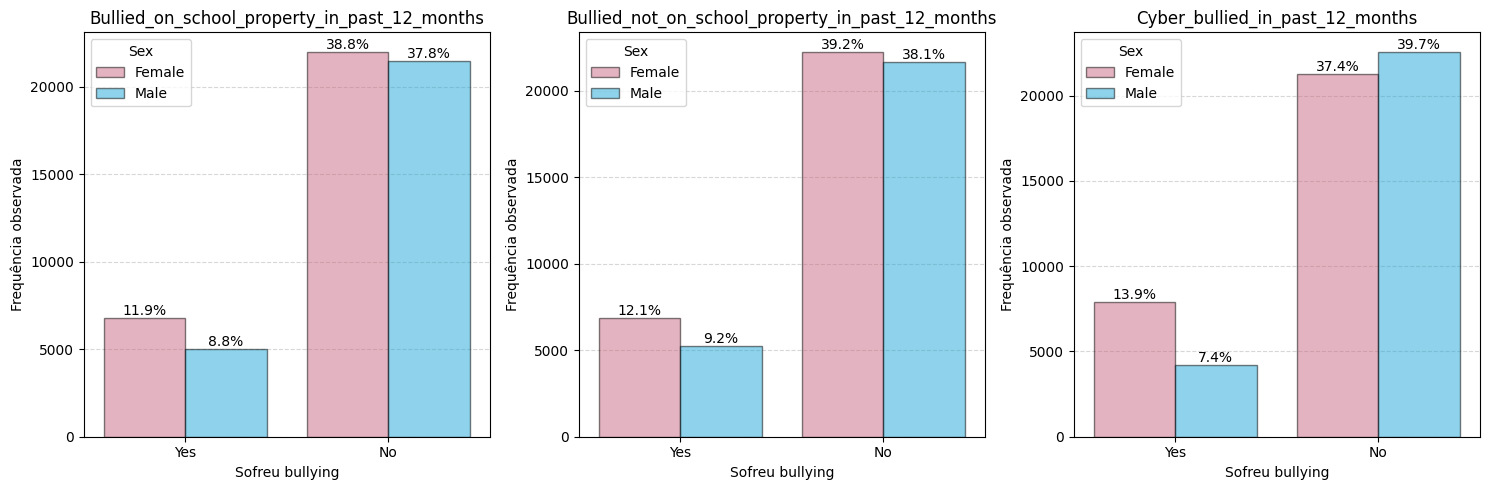

In [ ]:
# Definindo as colunas de bullying
bullying_columns = ['Bullied_on_school_property_in_past_12_months',
                    'Bullied_not_on_school_property_in_past_12_months',
                    'Cyber_bullied_in_past_12_months']

# Tamanho da figura
plt.figure(figsize=(15, 5))

# Para cada tipo de bullying, plotamos a distribuição de acordo com o gênero
for i, column in enumerate(bullying_columns):
    plt.subplot(1, 3, i+1)  # Colocando os gráficos em subplots

    # Ajustando a ordem das barras para a coluna Cyber_bullied_in_past_12_months
    if column == 'Cyber_bullied_in_past_12_months':
        order = ['Yes', 'No']  # Definindo a ordem desejada
    else:
        order = None  # Para os outros tipos de bullying, usamos a ordem padrão

    # Criando o countplot
    ax = sns.countplot(data=df, x=column, hue='Sex', edgecolor='black', alpha=0.5,
                       palette={'Male': '#00B5F7', 'Female': '#DC587D'}, zorder=2,
                       order=order)

    # Adicionando as linhas de grade horizontais
    plt.grid(True, axis='y', linestyle='--', alpha=0.5, zorder=0)

    # Adicionando título e rótulos
    ax.set_title(f'{column}')
    ax.set_xlabel('Sofreu bullying')
    ax.set_ylabel('Frequência observada')

    # Ajustando os limites do eixo X
    if order is not None:
        plt.xlim(-0.5, len(order) - 0.5)  # Ajuste dinâmico para gráficos com um `order` específico
    else:
        plt.xlim(-0.5, 1.5)  # Ajuste para o gráfico "Cyber_bullied_in_past_12_months" ou outros gráficos sem `order`

    # Garantindo o alinhamento do eixo X com os ticks
    if order is not None:
        ax.set_xticks(range(len(order)))  # Garantir que o eixo X tenha os ticks corretos

    # Remover o ticklabel 0 do eixo X ajustando manualmente os ticks
    tick_labels = ax.get_xticklabels()  # Pega todos os labels atuais
    new_labels = [label.get_text() if label.get_text() != '0' else '' for label in tick_labels]  # Remove o label "0"
    ax.set_xticks(ax.get_xticks())  # Garantir que os ticks sejam configurados
    ax.set_xticklabels(new_labels)  # Define os tick labels sem o "0"

    # Exibindo apenas a porcentagem ou o valor absoluto
    total = len(df[column])  # Total de observações para a coluna
    for p in ax.patches:
        height = p.get_height()  # Valor absoluto da barra
        percentage = (height / total) * 100  # Calculando a porcentagem

        # Exibindo somente a porcentagem ou o número absoluto
        if height > 0:  # Se a barra tem valor maior que zero, exibe a porcentagem ou o valor absoluto
            # Se você quer exibir a porcentagem
            ax.text(p.get_x() + p.get_width() / 2., height + 1,  # Colocando acima da barra
                    f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)  # Exibindo a porcentagem
plt.tight_layout()
plt.show()

- Tipos de bullying por idade

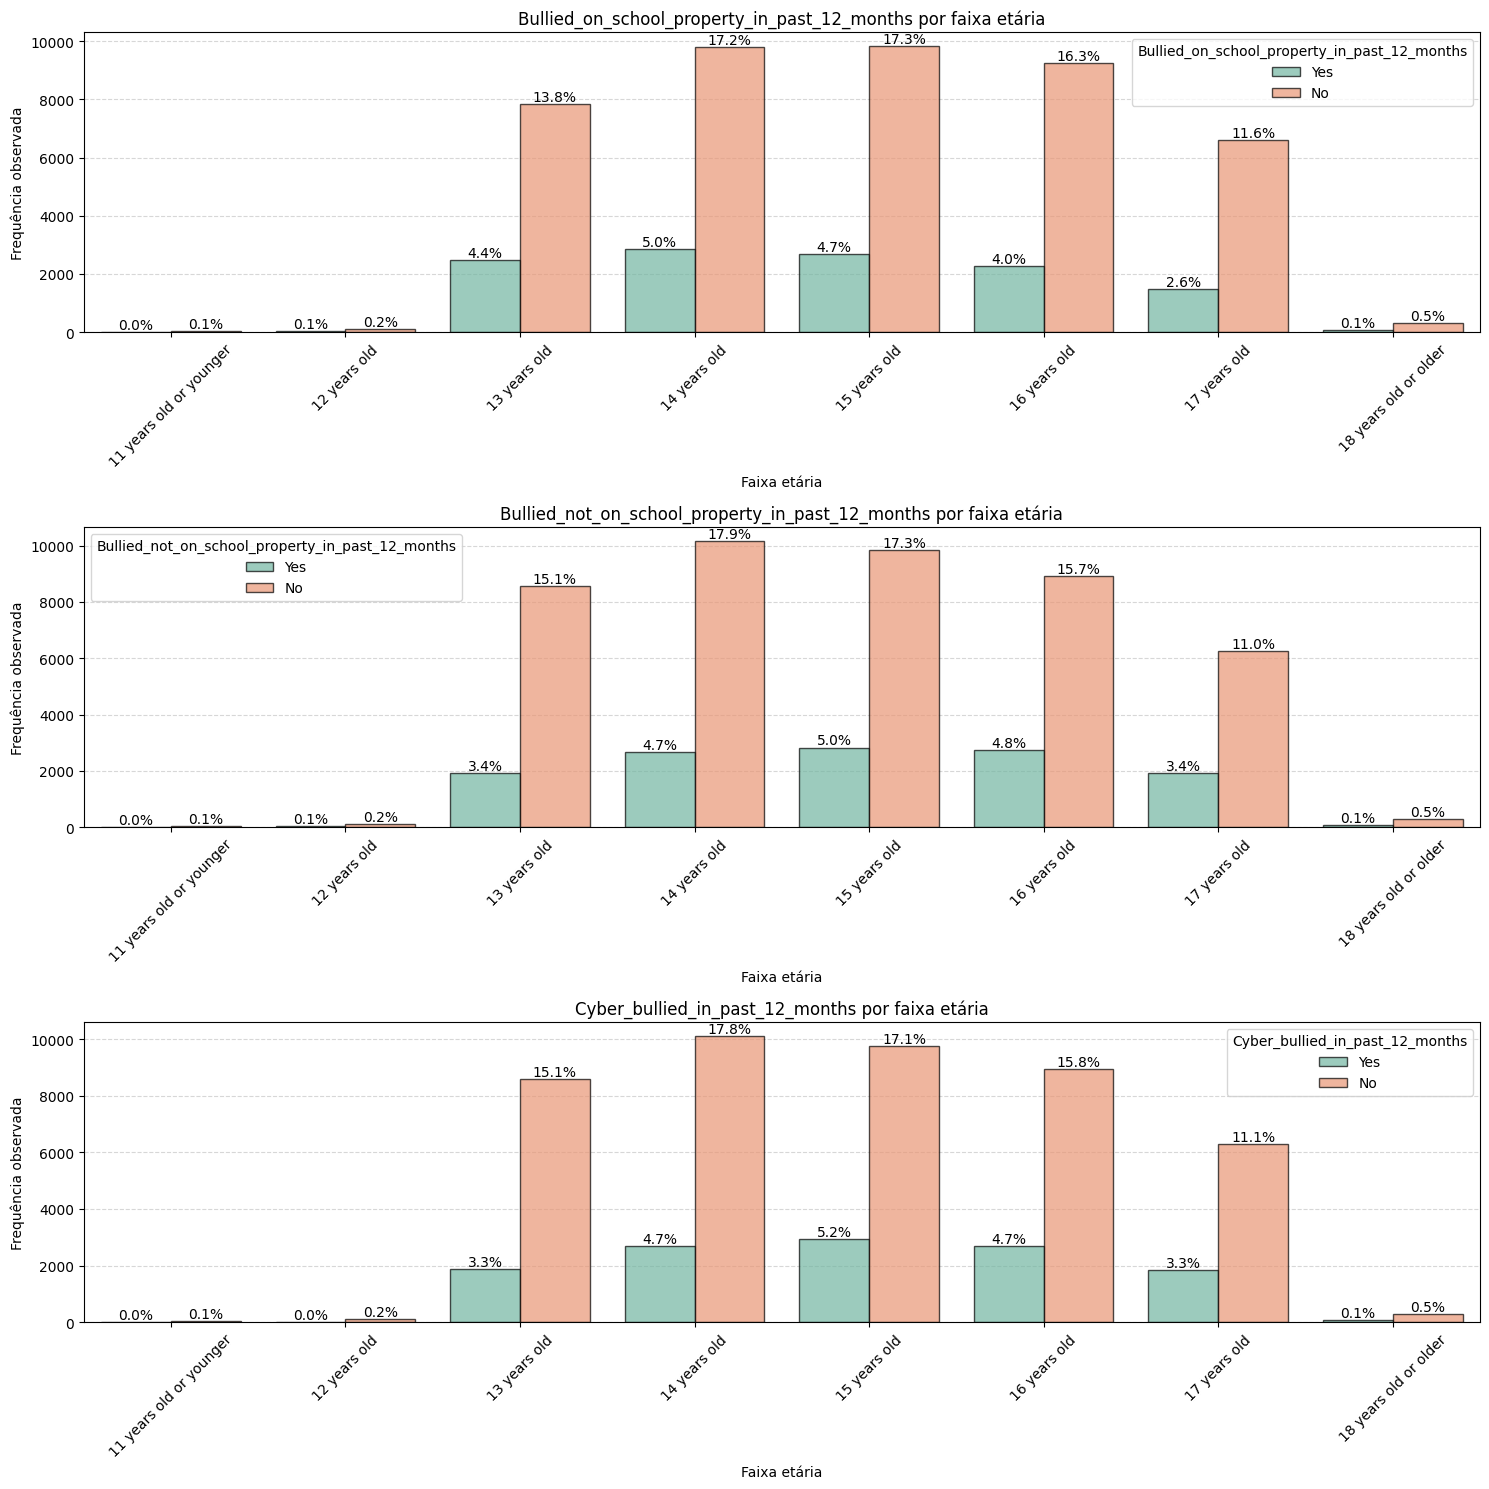

In [ ]:
# Definindo as colunas de bullying
bullying_columns = ['Bullied_on_school_property_in_past_12_months',
                    'Bullied_not_on_school_property_in_past_12_months',
                    'Cyber_bullied_in_past_12_months']

# Lista de idades ordenadas em ordem crescente
age_order = ['11 years old or younger', '12 years old', '13 years old', '14 years old',
             '15 years old', '16 years old', '17 years old', '18 years old or older']

# Tamanho da figura
plt.figure(figsize=(15, 15))  # Aumente a altura da figura para caber os 3 gráficos em linha

# Para cada tipo de bullying, plotamos a distribuição de acordo com a faixa etária
for i, column in enumerate(bullying_columns):
    plt.subplot(3, 1, i+1)  # Colocando os gráficos um abaixo do outro

    # Definir a ordem para o gráfico "Cyber_bullied_in_past_12_months"
    if column == 'Cyber_bullied_in_past_12_months':
        order = ['Yes', 'No']  # Ordem manual para "Cyber_bullied_in_past_12_months"
        hue_order = ['Yes', 'No']  # Garante que "No" venha antes de "Yes"
    else:
        order = None  # Para as outras colunas, usa-se a ordem padrão
        hue_order = None  # Não altera a ordem do hue para os outros gráficos

    # Criando o countplot para cada tipo de bullying por idade
    ax = sns.countplot(data=df, x='Custom_Age', hue=column, edgecolor='black', alpha=0.7,
                       palette='Set2', zorder=2, order=age_order, hue_order=hue_order)


    # Adicionando as linhas de grade horizontais
    plt.grid(True, axis='y', linestyle='--', alpha=0.5, zorder=0)

    # Adicionando título e rótulos
    ax.set_title(f'{column} por faixa etária')
    ax.set_xlabel('Faixa etária')
    ax.set_ylabel('Frequência observada')

    # Ajustando os limites do eixo X para que as barras de idade fiquem bem distribuídas
    plt.xticks(rotation=45)  # Rotaciona os labels do eixo X para facilitar a leitura
    plt.xlim(-0.5, len(age_order) - 0.5)  # Garantir que todas as faixas de idade sejam mostradas

    # Exibindo os números absolutos ou porcentagens acima das barras
    total = len(df[column])  # Total de observações para a coluna
    for p in ax.patches:
        height = p.get_height()  # Valor absoluto da barra
        percentage = (height / total) * 100  # Calculando a porcentagem

        # Exibindo apenas a porcentagem ou o número absoluto
        if height > 0:  # Se a barra tem valor maior que zero, exibe a porcentagem ou o valor absoluto
            # Exibindo a porcentagem
            ax.text(p.get_x() + p.get_width() / 2., height + 1,
                    f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)  # Exibindo a porcentagem

            # Para exibir o valor absoluto, substitua a linha acima pela seguinte:
            # ax.text(p.get_x() + p.get_width() / 2., height + 1,  # Colocando acima da barra
            #         f'{int(height)}', ha='center', va='bottom', fontsize=10)  # Exibindo o número absoluto

plt.tight_layout()
plt.show()

### 2.2. - Boxplots para cada tipos de bullying por gênero e idade.

- Boxplots de modalidade de bullying por gênero

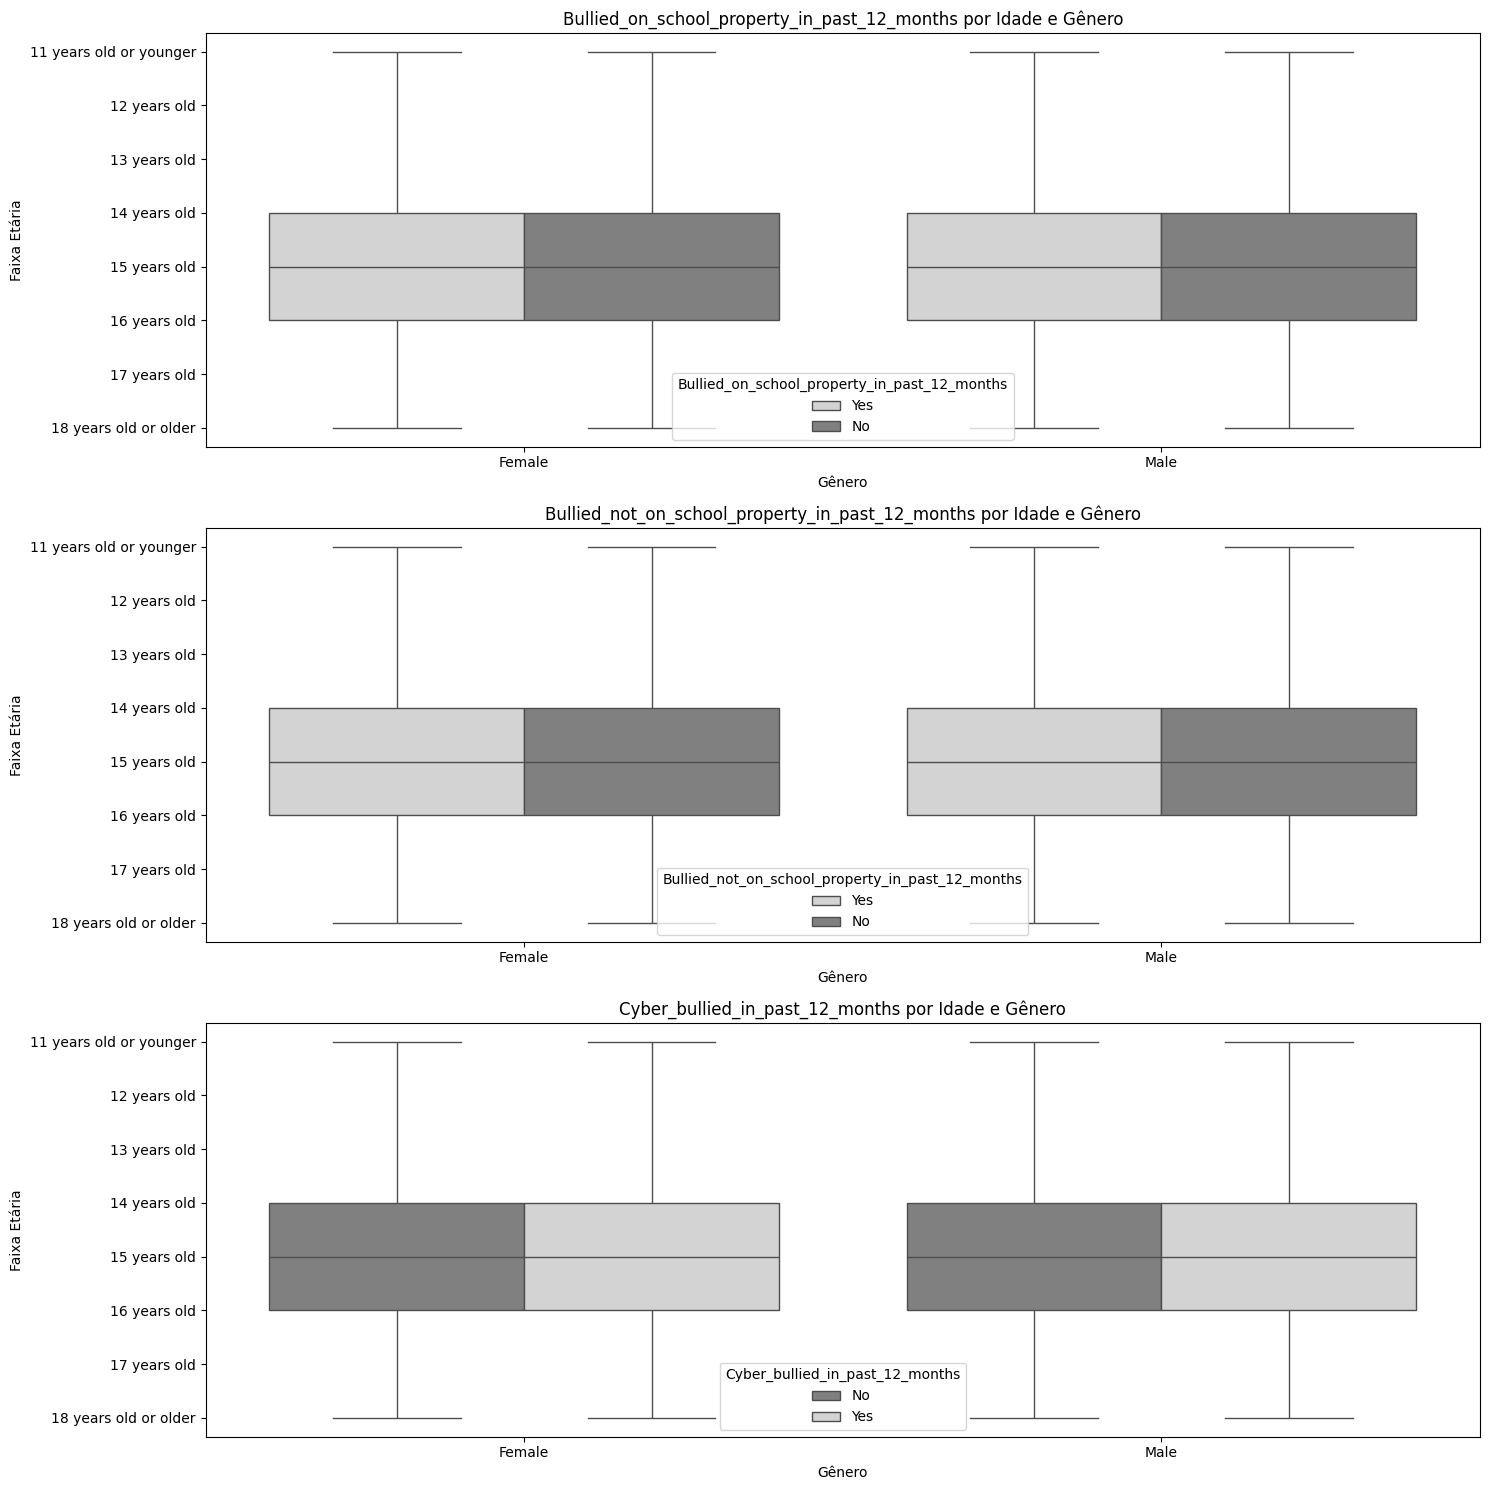

In [ ]:
# Definindo as faixas etárias e sua ordem
age_order = ['11 years old or younger', '12 years old', '13 years old', '14 years old', '15 years old', '16 years old', '17 years old', '18 years old or older']

# Mapeando as faixas de idade para uma categoria ordenada
df['Custom_Age'] = pd.Categorical(df['Custom_Age'], categories=age_order, ordered=True)

# Tamanho da figura
plt.figure(figsize=(15, 15))

# Listando as colunas para tipos de bullying
bullying_columns = ['Bullied_on_school_property_in_past_12_months',
                    'Bullied_not_on_school_property_in_past_12_months',
                    'Cyber_bullied_in_past_12_months']

# Criando gráficos de boxplot para cada tipo de bullying
for i, column in enumerate(bullying_columns):
    plt.subplot(3, 1, i+1)  # 3 linhas, 1 coluna

    # Criando o boxplot para idade (y) por gênero (x) e tipo de bullying
    sns.boxplot(data=df,
                x='Sex',
                y='Custom_Age',
                hue=column,
                palette={'Yes': 'lightgray', 'No': 'gray'},
                showfliers=False)

    # Adicionando título e rótulos
    plt.title(f'{column} por Idade e Gênero')
    plt.xlabel('Gênero')
    plt.ylabel('Faixa Etária')

plt.tight_layout()
plt.show()

## Item 3
*(Enunciado do desafio 3)* &nbsp;Calcule a matriz de correlação para todas as variáveis numéricas e identifique as correlações mais fortes e mais fracas.

### 3.1. - Preparando dados para a correlação

- Examinando o DF de trabalho para esta fase

In [ ]:
df_encoded.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,NaN,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,NaN,NaN,NaN
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,NaN,NaN,NaN
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,NaN,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,NaN,NaN,NaN


In [ ]:
print(df_encoded.dtypes)

record                                               int64
Bullied_on_school_property_in_past_12_months        object
Bullied_not_on_school_property_in_past_12_months    object
Cyber_bullied_in_past_12_months                     object
Custom_Age                                          object
Sex                                                 object
Physically_attacked                                 object
Physical_fighting                                   object
Felt_lonely                                         object
Close_friends                                       object
Miss_school_no_permission                           object
Other_students_kind_and_helpful                     object
Parents_understand_problems                         object
Most_of_the_time_or_always_felt_lonely              object
Missed_classes_or_school_without_permission         object
Were_underweight                                    object
Were_overweight                                     obje

└── Como se vê acima todos os dados (exceto coluna record) são do tipo object e terão de ser convertidos para variáveis numéricas.

- Deletando a coluna record

In [ ]:
# Deletando a coluna 'record' do DataFrame
df_encoded = df_encoded.drop('record', axis=1)

- Verificando presença de valores nulos

In [ ]:
for coluna in df_encoded.columns:
  print(coluna)
  print(f'{df_encoded[coluna].unique()}')
  print("-" * 40)

Bullied_on_school_property_in_past_12_months
['Yes' 'No' nan]
----------------------------------------
Bullied_not_on_school_property_in_past_12_months
['Yes' 'No' nan]
----------------------------------------
Cyber_bullied_in_past_12_months
[nan 'No' 'Yes']
----------------------------------------
Custom_Age
['13 years old' '14 years old' '16 years old' '12 years old'
 '15 years old' '11 years old or younger' '17 years old' nan
 '18 years old or older']
----------------------------------------
Sex
['Female' 'Male' nan]
----------------------------------------
Physically_attacked
['0 times' '1 time' '12 or more times' '4 or 5 times' '2 or 3 times'
 '10 or 11 times' '8 or 9 times' '6 or 7 times' nan]
----------------------------------------
Physical_fighting
['0 times' '2 or 3 times' '1 time' '4 or 5 times' '6 or 7 times'
 '8 or 9 times' '10 or 11 times' nan '12 or more times']
----------------------------------------
Felt_lonely
['Always' 'Never' 'Rarely' 'Sometimes' 'Most of the time'

└── Todos estes valors NaN precisarão ser tratados para a aplicação da análise de corelação

- Criando o novo DataFrame de trabalho para esta faase

In [ ]:
df_cleaned= df_encoded.copy()

- Removendo linhas com valores nulos

In [ ]:
df_cleaned.dropna(inplace=True)

- Análise da porcentagem de valores NaN nas colunas

In [ ]:
# Cálculo da porcentagem de NaN em cada coluna
nan_percentage = df_cleaned.isna().mean() * 100
print(nan_percentage.round(2).sort_values(ascending=False))

Bullied_on_school_property_in_past_12_months        0.0
Miss_school_no_permission                           0.0
Were_overweight                                     0.0
Were_underweight                                    0.0
Missed_classes_or_school_without_permission         0.0
Most_of_the_time_or_always_felt_lonely              0.0
Parents_understand_problems                         0.0
Other_students_kind_and_helpful                     0.0
Close_friends                                       0.0
Bullied_not_on_school_property_in_past_12_months    0.0
Felt_lonely                                         0.0
Physical_fighting                                   0.0
Physically_attacked                                 0.0
Sex                                                 0.0
Custom_Age                                          0.0
Cyber_bullied_in_past_12_months                     0.0
Were_obese                                          0.0
dtype: float64


In [ ]:
for coluna in df_cleaned.columns:
  print(coluna)
  print(f'{df_cleaned[coluna].unique()}')
  print("-" * 40)

Bullied_on_school_property_in_past_12_months
['No' 'Yes']
----------------------------------------
Bullied_not_on_school_property_in_past_12_months
['No' 'Yes']
----------------------------------------
Cyber_bullied_in_past_12_months
['No' 'Yes']
----------------------------------------
Custom_Age
['14 years old' '13 years old' '15 years old' '16 years old'
 '17 years old' '12 years old' '18 years old or older'
 '11 years old or younger']
----------------------------------------
Sex
['Male' 'Female']
----------------------------------------
Physically_attacked
['0 times' '1 time' '4 or 5 times' '10 or 11 times' '2 or 3 times'
 '12 or more times' '6 or 7 times' '8 or 9 times']
----------------------------------------
Physical_fighting
['0 times' '1 time' '2 or 3 times' '8 or 9 times' '4 or 5 times'
 '6 or 7 times' '10 or 11 times' '12 or more times']
----------------------------------------
Felt_lonely
['Never' 'Most of the time' 'Rarely' 'Sometimes' 'Always']
--------------------------

### 3.2. - Encoding das variáveis categóricas    
Para fazer a anaálise de correlação e posteriormente o modelo de regressão logística, vamos precisar fazer o encoding, ou seja, a conversão das variáveis categóricas para numéricas.

- Aqui é aplicado o OrdinalEncoder para a conversão das variáveis ordinais com múltiplas categorias

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Definindo as colunas ordinais
ordinal_columns = [
    'Physically_attacked',
    'Physical_fighting',
    'Felt_lonely',
    'Close_friends',
    'Miss_school_no_permission',
    'Other_students_kind_and_helpful',
    'Parents_understand_problems'
]

# Definindo a ordem das categorias para cada variável ordinal
ordinal_mapping = {
    'Physically_attacked': ['0 times', '1 time', '2 or 3 times', '4 or 5 times', '6 or 7 times', '8 or 9 times', '10 or 11 times', '12 or more times'],
    'Physical_fighting': ['0 times', '1 time', '2 or 3 times', '4 or 5 times', '6 or 7 times', '8 or 9 times', '10 or 11 times', '12 or more times'],
    'Felt_lonely': ['Never', 'Rarely', 'Sometimes', 'Most of the time', 'Always'],
    'Close_friends': ['0', '1', '2', '3 or more'],
    'Miss_school_no_permission': ['0 days', '1 or 2 days', '3 to 5 days', '6 to 9 days', '10 or more days'],
    'Other_students_kind_and_helpful': ['Never', 'Rarely', 'Sometimes', 'Most of the time', 'Always'],
    'Parents_understand_problems': ['Never', 'Rarely', 'Sometimes', 'Most of the time', 'Always']
}

# Inicializando o OrdinalEncoder com o mapeamento de categorias
encoder_ord = OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_columns])

# Aplicando a codificação ordinal nas variáveis especificadas
df_cleaned[ordinal_columns] = encoder_ord.fit_transform(df_cleaned[ordinal_columns])

# Exibindo as primeiras linhas do DataFrame codificado
df_cleaned.head()

,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
2,No,No,No,14 years old,Male,0.0,0.0,0.0,3.0,0.0,2.0,4.0,No,No,No,No,No
5,No,No,No,13 years old,Male,0.0,1.0,0.0,3.0,0.0,3.0,4.0,No,No,No,No,No
10,No,No,No,15 years old,Male,0.0,1.0,0.0,3.0,2.0,3.0,4.0,No,Yes,No,No,No
22,No,No,Yes,13 years old,Male,0.0,2.0,3.0,3.0,0.0,1.0,4.0,Yes,No,No,No,No
23,No,No,No,14 years old,Male,0.0,2.0,3.0,2.0,0.0,4.0,2.0,Yes,No,No,Yes,Yes


- Aqui as variáveis binárias estão sendo codificadas via get_dummies()


In [ ]:
# Definindo as colunas binárias
binary_columns = ['Bullied_on_school_property_in_past_12_months',
                  'Bullied_not_on_school_property_in_past_12_months',
                  'Cyber_bullied_in_past_12_months',
                  'Sex',
                  'Most_of_the_time_or_always_felt_lonely',
                  'Missed_classes_or_school_without_permission',
                  'Were_underweight',
                  'Were_overweight',
                  'Were_obese']

# Passo 2: Aplicando get_dummies para realizar o One-Hot Encoding nas colunas binárias
df_cleaned = pd.get_dummies(df_cleaned, columns=binary_columns, drop_first=True)

# Passo 3: Exibindo as primeiras linhas do DataFrame atualizado
df_cleaned.head()

,Custom_Age,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Bullied_on_school_property_in_past_12_months_Yes,Bullied_not_on_school_property_in_past_12_months_Yes,Cyber_bullied_in_past_12_months_Yes,Sex_Male,Most_of_the_time_or_always_felt_lonely_Yes,Missed_classes_or_school_without_permission_Yes,Were_underweight_Yes,Were_overweight_Yes,Were_obese_Yes
2,14 years old,0.0,0.0,0.0,3.0,0.0,2.0,4.0,False,False,False,True,False,False,False,False,False
5,13 years old,0.0,1.0,0.0,3.0,0.0,3.0,4.0,False,False,False,True,False,False,False,False,False
10,15 years old,0.0,1.0,0.0,3.0,2.0,3.0,4.0,False,False,False,True,False,True,False,False,False
22,13 years old,0.0,2.0,3.0,3.0,0.0,1.0,4.0,False,False,True,True,True,False,False,False,False
23,14 years old,0.0,2.0,3.0,2.0,0.0,4.0,2.0,False,False,False,True,True,False,False,True,True


- Aqui é convertida a variável Custom_Age

In [ ]:
# Mapeamento das idades para valores numéricos
age_mapping = {
    '11 years old or younger': 11,
    '12 years old': 12,
    '13 years old': 13,
    '14 years old': 14,
    '15 years old': 15,
    '16 years old': 16,
    '17 years old': 17,
    '18 years old or older': 18
}

# Substituindo os valores de idade por números
df_cleaned['Custom_Age'] = df_cleaned['Custom_Age'].map(age_mapping)
df_cleaned.head()

,Custom_Age,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Bullied_on_school_property_in_past_12_months_Yes,Bullied_not_on_school_property_in_past_12_months_Yes,Cyber_bullied_in_past_12_months_Yes,Sex_Male,Most_of_the_time_or_always_felt_lonely_Yes,Missed_classes_or_school_without_permission_Yes,Were_underweight_Yes,Were_overweight_Yes,Were_obese_Yes
2,14,0.0,0.0,0.0,3.0,0.0,2.0,4.0,False,False,False,True,False,False,False,False,False
5,13,0.0,1.0,0.0,3.0,0.0,3.0,4.0,False,False,False,True,False,False,False,False,False
10,15,0.0,1.0,0.0,3.0,2.0,3.0,4.0,False,False,False,True,False,True,False,False,False
22,13,0.0,2.0,3.0,3.0,0.0,1.0,4.0,False,False,True,True,True,False,False,False,False
23,14,0.0,2.0,3.0,2.0,0.0,4.0,2.0,False,False,False,True,True,False,False,True,True


In [ ]:
for coluna in df_cleaned.columns:
  print(coluna)
  print(f'{df_cleaned[coluna].unique()}')
  print("-" * 40)

Custom_Age
[14 13 15 16 17 12 18 11]
----------------------------------------
Physically_attacked
[0. 1. 3. 6. 2. 7. 4. 5.]
----------------------------------------
Physical_fighting
[0. 1. 2. 5. 3. 4. 6. 7.]
----------------------------------------
Felt_lonely
[0. 3. 1. 2. 4.]
----------------------------------------
Close_friends
[3. 2. 0. 1.]
----------------------------------------
Miss_school_no_permission
[0. 2. 4. 1. 3.]
----------------------------------------
Other_students_kind_and_helpful
[2. 3. 1. 4. 0.]
----------------------------------------
Parents_understand_problems
[4. 2. 1. 3. 0.]
----------------------------------------
Bullied_on_school_property_in_past_12_months_Yes
[False  True]
----------------------------------------
Bullied_not_on_school_property_in_past_12_months_Yes
[False  True]
----------------------------------------
Cyber_bullied_in_past_12_months_Yes
[False  True]
----------------------------------------
Sex_Male
[ True False]
-------------------------

- Verificação dos tipos de dados convertidos  

In [ ]:
df_cleaned.dtypes

,0
Custom_Age,int64
Physically_attacked,float64
Physical_fighting,float64
Felt_lonely,float64
Close_friends,float64
Miss_school_no_permission,float64
Other_students_kind_and_helpful,float64
Parents_understand_problems,float64
Bullied_on_school_property_in_past_12_months_Yes,bool
Bullied_not_on_school_property_in_past_12_months_Yes,bool


- Listando as colunas atuais e renomeando as novas colunas para nomes mais amigáveis

In [ ]:
df_cleaned.columns

Index(['Custom_Age', 'Physically_attacked', 'Physical_fighting', 'Felt_lonely',
       'Close_friends', 'Miss_school_no_permission',
       'Other_students_kind_and_helpful', 'Parents_understand_problems',
       'Bullied_on_school_property_in_past_12_months_Yes',
       'Bullied_not_on_school_property_in_past_12_months_Yes',
       'Cyber_bullied_in_past_12_months_Yes', 'Sex_Male',
       'Most_of_the_time_or_always_felt_lonely_Yes',
       'Missed_classes_or_school_without_permission_Yes',
       'Were_underweight_Yes', 'Were_overweight_Yes', 'Were_obese_Yes'],
      dtype='object')

In [ ]:
df_cleaned = df_cleaned.rename(columns={
    'Bullied_on_school_property_in_past_12_months_Yes': 'Bullied_on_school_property_in_past_12_months',
    'Bullied_not_on_school_property_in_past_12_months_Yes': 'Bullied_not_on_school_property_in_past_12_months',
    'Cyber_bullied_in_past_12_months_Yes': 'Cyber_bullied_in_past_12_months',
    'Sex_Male': 'Sex',
    'Most_of_the_time_or_always_felt_lonely_Yes': 'Most_of_the_time_or_always_felt_lonely',
    'Missed_classes_or_school_without_permission_Yes': 'Missed_classes_or_school_without_permission',
    'Were_underweight_Yes': 'Were_underweight',
    'Were_overweight_Yes': 'Were_overweight',
    'Were_obese_Yes': 'Were_obese'
})

# Visualizando as primeiras linhas após a renomeação
df_cleaned.head()

,Custom_Age,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Sex,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
2,14,0.0,0.0,0.0,3.0,0.0,2.0,4.0,False,False,False,True,False,False,False,False,False
5,13,0.0,1.0,0.0,3.0,0.0,3.0,4.0,False,False,False,True,False,False,False,False,False
10,15,0.0,1.0,0.0,3.0,2.0,3.0,4.0,False,False,False,True,False,True,False,False,False
22,13,0.0,2.0,3.0,3.0,0.0,1.0,4.0,False,False,True,True,True,False,False,False,False
23,14,0.0,2.0,3.0,2.0,0.0,4.0,2.0,False,False,False,True,True,False,False,True,True


### 3.3. - Cálculo da matriz de correlação    
Estando com todas as variáveis codificadas, podemos agora calcular a matriz de correlação entre as variáveis numéricas, o que vai nos ajudar a identificar como as variáveis estão inter-relacionadas.   

Iríamos utilizar a correlação de Pearson, porém - após pesquisa - optou-se pela correlação de Spearman. Motivo? A existência de variáveis ordinais nos dados.

- Cálculo da Matriz de Correlação  
As colunas Unknown foram removidas para evitar o risco da redundância e multicolinearidade.

In [ ]:
# Selecionando apenas as colunas numéricas para a correlação de Spearman
columns_for_spearman = [
    'Custom_Age',
    'Physically_attacked',
    'Physical_fighting',
    'Felt_lonely',
    'Close_friends',
    'Miss_school_no_permission',
    'Other_students_kind_and_helpful',
    'Parents_understand_problems',
    'Bullied_on_school_property_in_past_12_months',
    'Bullied_not_on_school_property_in_past_12_months',
    'Cyber_bullied_in_past_12_months',
    'Sex',
    'Most_of_the_time_or_always_felt_lonely',
    'Missed_classes_or_school_without_permission',
    'Were_underweight',
    'Were_overweight',
    'Were_obese'
]

# Calculando a correlação de Spearman
correlation_matrix = df_cleaned[columns_for_spearman].corr(method='spearman')

- Plotagem do Mapa de Calor (Heatmap)

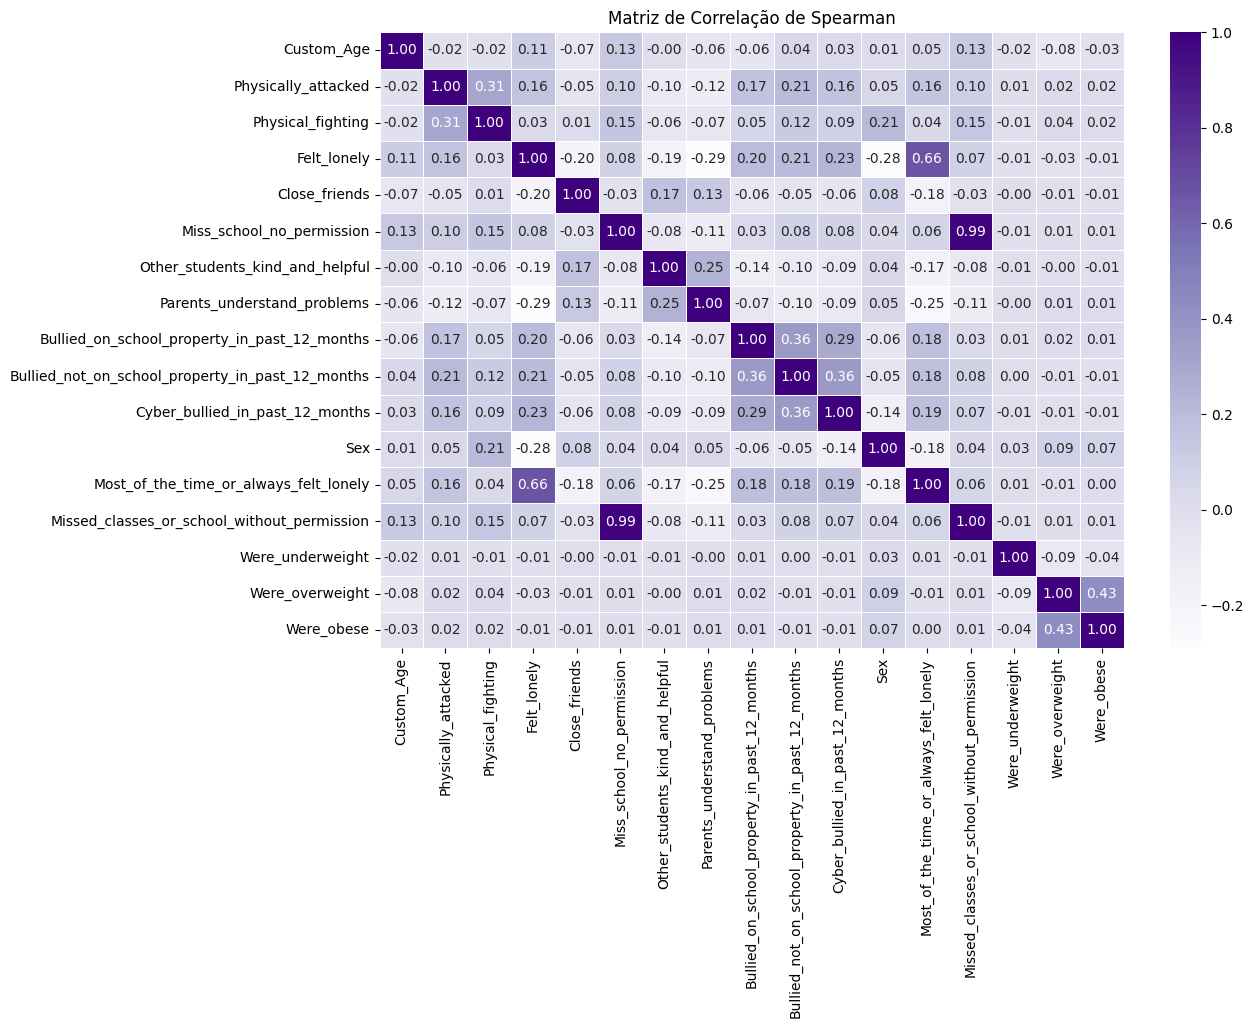

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Matriz de Correlação de Spearman')
plt.show()

### 3.4. - Identifique as correlações mais fortes e mais fracas

In [ ]:
# Criando uma série com todas as correlações (exceto 1, que são auto-correlações)
correlation_series_spearman = correlation_matrix.abs().unstack()  # Calculando o valor absoluto
correlation_series_spearman = correlation_series_spearman[correlation_series_spearman < 1.0]  # Excluindo a correlação com ela mesma (1)

# Ordenando pela magnitude da correlação
sorted_correlation_spearman = correlation_series_spearman.sort_values(ascending=False)

# Exibindo as 10 maiores correlações
print("As 20 correlações mais fortes:")
print(sorted_correlation_spearman.head(20))

# Exibindo as 10 menores correlações (em termos de magnitude)
print("\nAs 20 correlações mais fracas:")
print(sorted_correlation_spearman.tail(20))

As 20 correlações mais fortes:
Missed_classes_or_school_without_permission       Miss_school_no_permission                           0.985415
Miss_school_no_permission                         Missed_classes_or_school_without_permission         0.985415
Felt_lonely                                       Most_of_the_time_or_always_felt_lonely              0.663468
Most_of_the_time_or_always_felt_lonely            Felt_lonely                                         0.663468
Were_obese                                        Were_overweight                                     0.432258
Were_overweight                                   Were_obese                                          0.432258
Bullied_not_on_school_property_in_past_12_months  Bullied_on_school_property_in_past_12_months        0.363678
Bullied_on_school_property_in_past_12_months      Bullied_not_on_school_property_in_past_12_months    0.363678
Cyber_bullied_in_past_12_months                   Bullied_not_on_school_property_

# **Parte II - Modelagem de Dados**   


## Item 1
*(Enunciado do desafio 1)* &nbsp;Construa um modelo de regressão logística para prever a probabilidade de um indivíduo sofrer bullying na escola, considere como target: Bullied_on_school_property_in_past_12_months que representa 1 caso o indivíduo tenha sofrido bullying na escola nos últimos 12 meses, 0 caso contrário.  

### 1.1. Preparando dados para a modelagem

- Criando no novo DataFrame de trabalho

In [ ]:
# Criando o DataFrame de trabalho
df_model = df_cleaned.copy()

In [ ]:
# Verificação de valores únicos
for coluna in df_model.columns:
  print(coluna)
  print(f'{df_model[coluna].unique()}')
  print("-" * 40)

Custom_Age
[14 13 15 16 17 12 18 11]
----------------------------------------
Physically_attacked
[0. 1. 3. 6. 2. 7. 4. 5.]
----------------------------------------
Physical_fighting
[0. 1. 2. 5. 3. 4. 6. 7.]
----------------------------------------
Felt_lonely
[0. 3. 1. 2. 4.]
----------------------------------------
Close_friends
[3. 2. 0. 1.]
----------------------------------------
Miss_school_no_permission
[0. 2. 4. 1. 3.]
----------------------------------------
Other_students_kind_and_helpful
[2. 3. 1. 4. 0.]
----------------------------------------
Parents_understand_problems
[4. 2. 1. 3. 0.]
----------------------------------------
Bullied_on_school_property_in_past_12_months
[False  True]
----------------------------------------
Bullied_not_on_school_property_in_past_12_months
[False  True]
----------------------------------------
Cyber_bullied_in_past_12_months
[False  True]
----------------------------------------
Sex
[ True False]
----------------------------------------
M

In [ ]:
# Contagem de quantas vezes NaN aparece em cada coluna
nan_counts = df_model.isna().sum()
print(nan_counts.sort_values(ascending=False))

Custom_Age                                          0
Bullied_not_on_school_property_in_past_12_months    0
Were_overweight                                     0
Were_underweight                                    0
Missed_classes_or_school_without_permission         0
Most_of_the_time_or_always_felt_lonely              0
Sex                                                 0
Cyber_bullied_in_past_12_months                     0
Bullied_on_school_property_in_past_12_months        0
Physically_attacked                                 0
Parents_understand_problems                         0
Other_students_kind_and_helpful                     0
Miss_school_no_permission                           0
Close_friends                                       0
Felt_lonely                                         0
Physical_fighting                                   0
Were_obese                                          0
dtype: int64


In [ ]:
# Verificando o número de instâncias e colunas no DataFrame
num_linhas, num_colunas = df_model.shape
print(f"O dataset tem {num_linhas} instâncias e {num_colunas} variáveis (features).")

O dataset tem 32938 instâncias e 17 variáveis (features).


- Análise de desbalanceamento de classes

In [ ]:
counts = df_model['Bullied_on_school_property_in_past_12_months'].value_counts()
print(counts)

Bullied_on_school_property_in_past_12_months
False    26068
True      6870
Name: count, dtype: int64


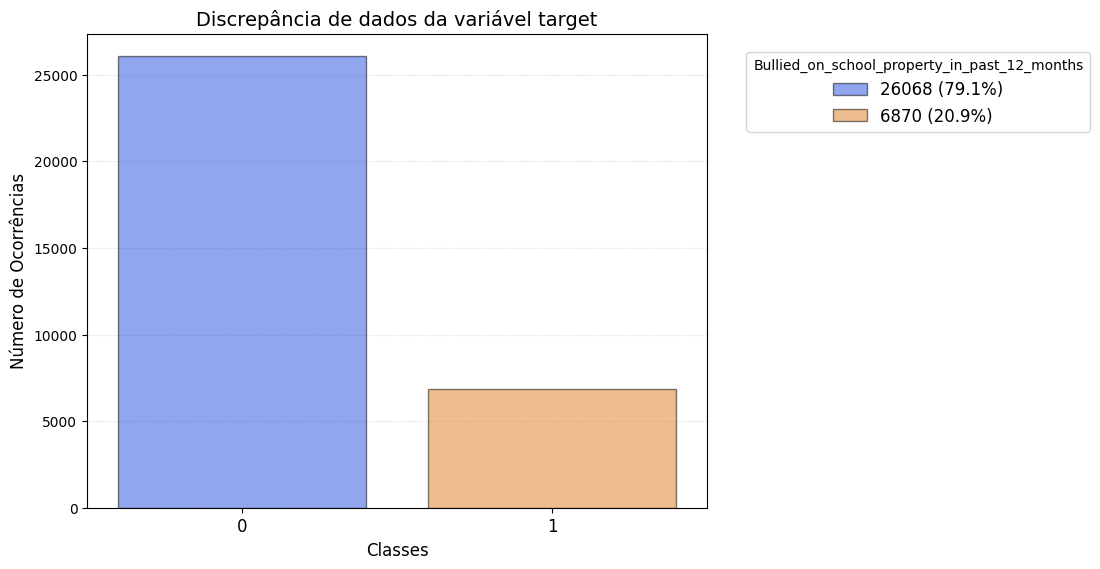

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo a coluna
column = 'Bullied_on_school_property_in_past_12_months'

# Contagem das classes para o gráfico de barras
order = df_model[column].value_counts().index

# Plotando o gráfico com seaborn (countplot)
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_model, x=column, palette='bright', hue=column, legend=False,
                   order=order, zorder=3, edgecolor='black', alpha=0.5)

# Adicionando título e rótulos
plt.title('Discrepância de dados da variável target', fontsize=14)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)

# Editando os ticks (rótulos) no eixo X
plt.xticks(ticks=[0, 1], labels=['0', '1'], fontsize=12)

# Calculando o total de observações para os percentuais
total = len(df_model)

# Gerando um texto de legenda com valores absolutos e relativos
legend_labels = []

# Para cada barra, calculamos os valores absolutos e percentuais
for p in ax.patches:
    height = p.get_height()  # valor absoluto
    percentage = (height / total) * 100  # percentual
    label = f'{int(height)} ({percentage:.1f}%)'
    legend_labels.append(label)

# Adicionando a legenda personalizada ao gráfico (fora à esquerda)
plt.legend(legend_labels, title='Bullied_on_school_property_in_past_12_months', loc='upper left', bbox_to_anchor=(1.05, 0.98), fontsize=12)

# Subindo um pouco a borda superior (ajustando o espaço)
plt.subplots_adjust(top=0.9)

plt.grid(True, axis='y', linestyle=':', alpha=0.5, zorder=0)

# Exibindo o gráfico
plt.show()

### 1.2. Início da construção do modelo   


- Aqui é feita a separação de dados entre as features (ou seja, as variáveis que serão usadas para prever o bullying na escola) e a variável dependente ou target (Bullied_on_school_property_in_past_12_months).

In [ ]:
# Definir variável target (y) e variáveis independentes (X)
X = df_model.drop('Bullied_on_school_property_in_past_12_months', axis=1)
y = df_model['Bullied_on_school_property_in_past_12_months']

# Verificar as dimensões para garantir que a separação está correta
print("Dimensão das variáveis independentes (X):", X.shape)
print("Dimensão da variável dependente (y):", y.shape)

Dimensão das variáveis independentes (X): (32938, 16)
Dimensão da variável dependente (y): (32938,)


- Identificando e fazendo o escalonamento de variáveis

In [ ]:
# Listando as variáveis que precisam de escalonamento
scalable_columns = [
    'Physically_attacked', 'Physical_fighting', 'Felt_lonely', 'Close_friends',
    'Miss_school_no_permission', 'Other_students_kind_and_helpful',
    'Parents_understand_problems'
]

- Aqui é aplicado o escalonamento das variáveis que têm diderentes escalas

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializando o escalonador
scaler = StandardScaler()

# Aplicando o escalonamento nas variáveis contínuas
X[scalable_columns] = scaler.fit_transform(X[scalable_columns])

- Agora os dados são divididos em conjunto de treinamento e conjunto de teste (80% treinamento e 20% teste)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Exibindo as formas dos dados
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (26350, 16)
Tamanho do conjunto de teste: (6588, 16)


## Item 2
*(Enunciado do desafio 3)* Analise as variáveis mais relevantes no modelo.


### 2.1. Análise das variáveis mais relevantes no modelo.  
- Aqui é feita a análise de importância das variáveis, através do módulo RandomForestClassifier, para determinação de quais as variáveis devem fazer parte do modelo de regressão.  

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Criando o modelo RandomForest com ajuste de pesos para lidar com classes desbalanceadas
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Treinando o modelo
model_rf.fit(X_train, y_train)

# Obtendo a importância das variáveis
importances = model_rf.feature_importances_

# Criando um DataFrame para visualizar a importância das variáveis
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Ordenando o DataFrame pela importância das variáveis
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibindo a tabela com as variáveis mais importantes
print("Importância das variáveis:")
print(importance_df)

Importância das variáveis:
                                             Feature  Importance
7                        Parents_understand_problems    0.132047
0                                         Custom_Age    0.125931
8   Bullied_not_on_school_property_in_past_12_months    0.119412
6                    Other_students_kind_and_helpful    0.101262
9                    Cyber_bullied_in_past_12_months    0.075651
4                                      Close_friends    0.075047
3                                        Felt_lonely    0.070156
2                                  Physical_fighting    0.066500
1                                Physically_attacked    0.052067
5                          Miss_school_no_permission    0.046993
10                                               Sex    0.039538
14                                   Were_overweight    0.036299
12       Missed_classes_or_school_without_permission    0.019647
15                                        Were_obese    0.01573

- Plotando o gráfico de importância das variáeis

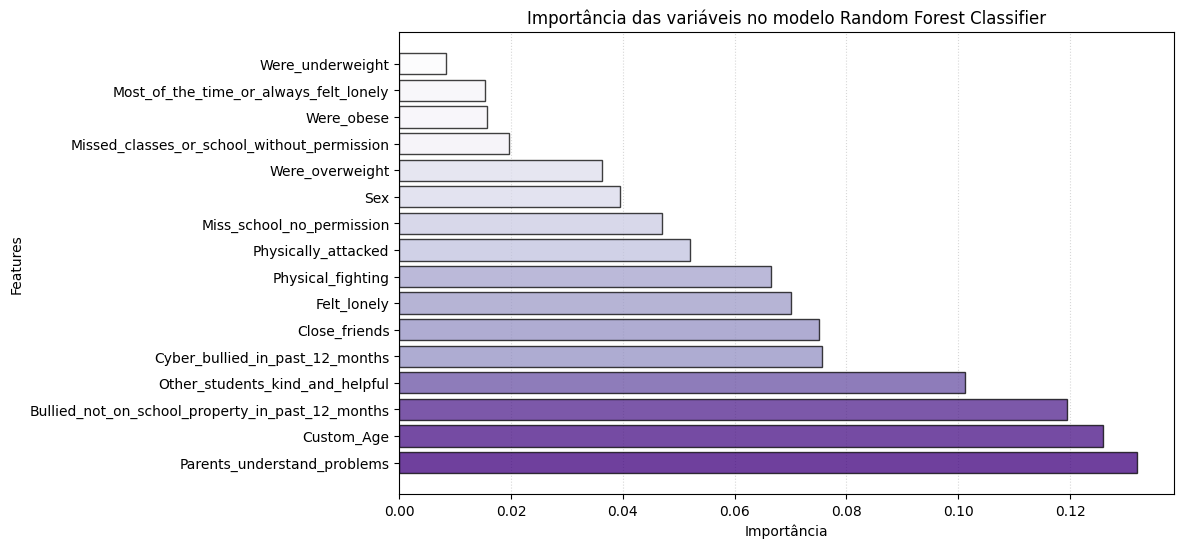

In [ ]:
import matplotlib.cm as cm

# Ordenar os dados do DataFrame pela importância de forma decrescente
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Gerar um degradê de cores roxas (purple)
norm = plt.Normalize(vmin=importance_df_sorted['Importance'].min(), vmax=importance_df_sorted['Importance'].max())
cmap = cm.Purples
colors = cmap(norm(importance_df_sorted['Importance']))

# Criando o gráfico de barras horizontais com o degradê de cor
plt.figure(figsize=(10, 6))
plt.barh(importance_df_sorted['Feature'], importance_df_sorted['Importance'], color=colors,
         edgecolor='black', alpha=0.75, zorder=2)

# Adicionando título e rótulos
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das variáveis no modelo Random Forest Classifier')

# Adicionar o grid horizontal
plt.grid(True, axis='x', linestyle=':', alpha=0.5, zorder=0)

# Exibir o gráfico
plt.show()

└── Após a comparação dos resultados obtidos na análise de importância das variáveis com os resultados obtidos também na análise de correlação (método de Spearman) da fase anterior, definimos que seguem para a fase de treinamento do modelo de regressão logística as seguinte variáveis:
- Parents_understand_problems
- Custom_Age
- Cyber_bullied_in_past_12_months
- Felt_lonely
- Physical_fighting
- Sex
  


- Tendo sido selecionadas as variáveis independentes, o conjunto X precisa ser atualizado para incluir apenas estas variáveis

In [ ]:
# Lista das variáveis selecionadas
selected_features = [
    'Parents_understand_problems',
    'Custom_Age',
    'Cyber_bullied_in_past_12_months',
    'Felt_lonely',
    'Physical_fighting',
    'Sex'
]

# Criar o conjunto X com as variáveis selecionadas do conjunto de treino
X_selected = X[selected_features]

# Verificando as dimensões do novo X
print("Dimensão do novo conjunto X:", X_selected.shape)

Dimensão do novo conjunto X: (32938, 6)


### 2.2. Construção e treinamento do  modelo inicial

- Separação entre conjuntos de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

- Treinamento do modelo de regressão logística (com o ajuste de pesos para lidar com o desbalanceamento.)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Criando o modelo de Regressão Logística com class_weight='balanced'
logreg = LogisticRegression(class_weight='balanced', random_state=42)

# Treinando o modelo com os dados de treino
logreg.fit(X_train_selected, y_train)

# Realizando as previsões no conjunto de teste
y_pred = logreg.predict(X_test_selected)

## Item 3
*(Enunciado do desafio 3)* &nbsp; Avalie a performance do modelo usando métricas como Acurácia, Precisão, Recall e plote a matriz de confusão.   

### 3.1.- Métricas de avaliação de desempenho do modelo

- Cálculo da AUC-ROC (Área sobre a Curva ROC)

In [ ]:
from sklearn.metrics import auc, roc_curve

# Calcular as probabilidades preditas (não apenas as classes)
y_probs = logreg.predict_proba(X_test_selected)[:, 1]  # Pega a probabilidade da classe positiva (1)

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC (Área sob a Curva)
roc_auc = auc(fpr, tpr)

# Exibindo o valor da AUC
print(f"AUC-ROC: {roc_auc:.2f}")

AUC-ROC: 0.73


└── A AUC-ROC de 0.73 indica que o modelo tem uma boa capacidade de discriminar entre as classes: como este valor está acima de 0.5, isso sugere que o modelo está performando melhor do que uma classificação aleatória.

- Plotagem da Curva ROC

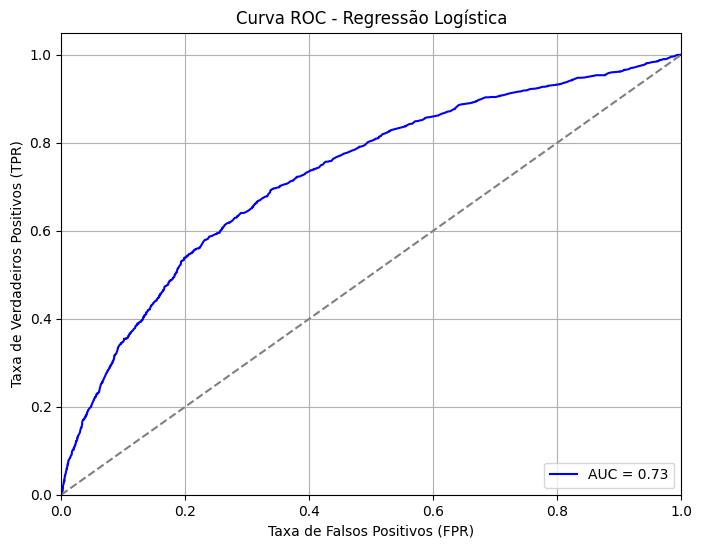

In [ ]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC (Área sob a Curva)
roc_auc = auc(fpr, tpr)

# Plotando a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha diagonal (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print(f"Mean CV AUC: {cv_scores.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean CV AUC: 0.7766845343200115


- Métrica da acurácia  

In [ ]:
from sklearn.metrics import accuracy_score

# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

Acurácia do modelo: 0.7148


└── O resultado obtido indica que 71,48% de todas as previsões foram corretas. A acurácia é uma métrica útil, porém que em modelos com dados desbalanceados, ela pode ser enganosa. pois não reflete completamente a performance do modelo, especialmente para a classe minoritária (no caso, a classe "sofreu bullying").


### 3.2. - Matriz de confusão  
Para verificar o desempenho em cada classe (bullying ou não bullying)  

[[3891 1323]
 [ 556  818]]


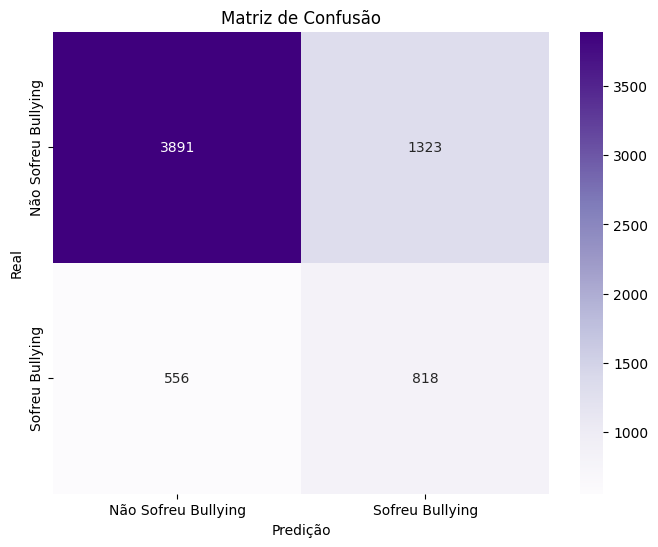

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotando o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Não Sofreu Bullying', 'Sofreu Bullying'], yticklabels=['Não Sofreu Bullying', 'Sofreu Bullying'])

# Adicionando título e rótulos aos eixos
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Real')

# Exibindo o gráfico
plt.show()

└── Aqui, o modelo está errando mais com falsos positivos e falsos negativos, o que já é esperado em casos de desbalanceamento

### 3.3. - Relatório de classificação

In [ ]:
from sklearn.metrics import classification_report

print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred))

Relatório de Classificação:

              precision    recall  f1-score   support

       False       0.87      0.75      0.81      5214
        True       0.38      0.60      0.47      1374

    accuracy                           0.71      6588
   macro avg       0.63      0.67      0.64      6588
weighted avg       0.77      0.71      0.73      6588



## Item 4 - Documentando a fase de ajustes do modelo

### 4.1. - Testando diferentes  thresholds no modelo de Regressão Logística

- Aqui testado com valor 0.4

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Criando o modelo de Regressão Logística com class_weight='balanced'
logreg = LogisticRegression(class_weight='balanced', random_state=42)

# Treinando o modelo com os dados de treino
logreg.fit(X_train_selected, y_train)

# Realizando as previsões de probabilidade no conjunto de teste
y_prob = logreg.predict_proba(X_test_selected)[:, 1]

# Ajuste do threshold
threshold = 0.40
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Exibindo a classificação final após ajuste do threshold
print(f"Threshold ajustado: {threshold}")
print(classification_report(y_test, y_pred_adjusted))

# Avaliando o modelo com a métrica AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc_roc:.4f}')

Threshold ajustado: 0.4
              precision    recall  f1-score   support

       False       0.90      0.55      0.68      5214
        True       0.31      0.77      0.44      1374

    accuracy                           0.60      6588
   macro avg       0.61      0.66      0.56      6588
weighted avg       0.78      0.60      0.63      6588

AUC-ROC: 0.7269


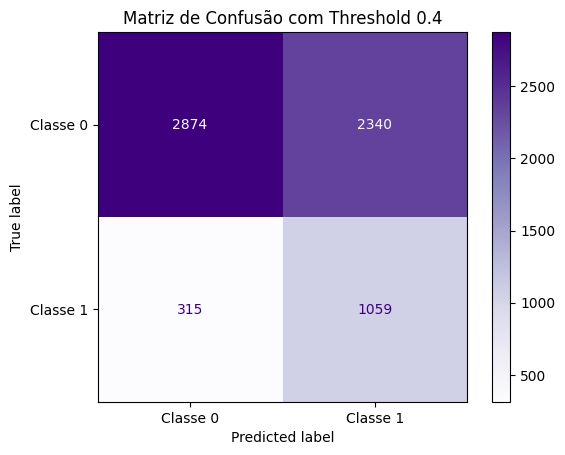

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_adjusted)

# Exibindo a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe 0', 'Classe 1'])
disp.plot(cmap=plt.cm.Purples)
plt.title(f'Matriz de Confusão com Threshold {threshold}')
plt.show()

- Aqui testado com valor 0.3

In [ ]:
# Realizando as previsões de probabilidade no conjunto de teste
y_prob = logreg.predict_proba(X_test_selected)[:, 1]

# Ajuste do threshold
threshold = 0.30
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Exibindo a classificação final após ajuste do threshold
print(f"Threshold ajustado: {threshold}")
print(classification_report(y_test, y_pred_adjusted))

# Avaliando o modelo com a métrica AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc_roc:.4f}')

Threshold ajustado: 0.3
              precision    recall  f1-score   support

       False       0.92      0.20      0.32      5214
        True       0.23      0.93      0.37      1374

    accuracy                           0.35      6588
   macro avg       0.58      0.56      0.35      6588
weighted avg       0.77      0.35      0.33      6588

AUC-ROC: 0.7269


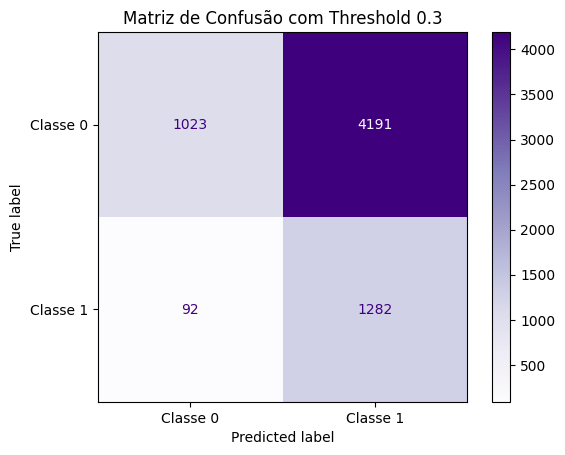

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_adjusted)

# Exibindo a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe 0', 'Classe 1'])
disp.plot(cmap=plt.cm.Purples)
plt.title(f'Matriz de Confusão com Threshold {threshold}')
plt.show()

In [ ]:
# Testando diferentes thresholds
thresholds = [0.5, 0.6, 0.7]
for threshold in thresholds:
    y_pred_adjusted = (y_prob >= threshold).astype(int)
    print(f"\nThreshold ajustado: {threshold}")
    print(classification_report(y_test, y_pred_adjusted))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")


Threshold ajustado: 0.5
              precision    recall  f1-score   support

       False       0.87      0.75      0.81      5214
        True       0.38      0.60      0.47      1374

    accuracy                           0.71      6588
   macro avg       0.63      0.67      0.64      6588
weighted avg       0.77      0.71      0.73      6588

AUC-ROC: 0.7269

Threshold ajustado: 0.6
              precision    recall  f1-score   support

       False       0.86      0.83      0.84      5214
        True       0.43      0.48      0.45      1374

    accuracy                           0.76      6588
   macro avg       0.64      0.65      0.65      6588
weighted avg       0.77      0.76      0.76      6588

AUC-ROC: 0.7269

Threshold ajustado: 0.7
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      5214
        True       0.48      0.35      0.41      1374

    accuracy                           0.78      6588
   macro avg       0.

**Análise**  

1. Threshold 0.3:  
Foi ótimo para maximizar o recall, o que é bom para detectar a maior quantidade possível de alunos sofrendo bullying, mas o custo é uma precisão baixa, resultando em muitos falso positivos. A acurácia de 0.35 ainda pode ser considerada baixa, mas pode ser aceitável dependendo da importância do recall na sua aplicação.  

2. Threshold 0.4:  
Começou a equilibrar melhor os falsos positivos e falsos negativos, mas ainda há um 'custo social', já que o modelo não está identificando perfeitamente todos os casos positivos.

3. Threshold 0.5:  
O modelo está identificando menos casos de bullying, mas com mais precisão. O f1-score não é tão bom, mas o modelo começa a ficar mais equilibrado.  

4. Threshold 0.6:  
O recall cai para 0.48, o que é preocupante se o objetivo é identificar o maior número de alunos possível que estão sofrendo bullying. A precisão também diminui, mas o modelo está identificando com maior acurácia.  

5. Threshold 0.7:  
O recall chega a 0.35, o que reduz ainda mais a capacidade de identificar os casos positivos. Embora a precisão suba para 0.48, o modelo já não está capturando adequadamente os alunos que realmente estão sofrendo bullying.     

### 4.2. - Testando o modelo Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Criando o modelo de Decision Tree com class_weight='balanced' (para lidar com desbalanceamento de classes)
tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Treinando o modelo
tree.fit(X_train_selected, y_train)

# Realizando as previsões no conjunto de teste
y_pred = tree.predict(X_test_selected)

# Calculando o AUC-ROC
y_pred_prob = tree.predict_proba(X_test_selected)[:, 1]  # Probabilidades para a classe positiva
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Imprimindo os resultados
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print(f"\nAUC-ROC: {auc_roc:.4f}")

# Se você quiser realizar validação cruzada para ver a performance média:
cv_auc = cross_val_score(tree, X_selected, y, cv=5, scoring='roc_auc').mean()
print(f"\nAUC-ROC (Validação Cruzada): {cv_auc:.4f}")

# Ajustando o threshold
# Vamos testar alguns thresholds, assim como fizemos com a regressão logística.
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    # Ajustando as previsões com o novo threshold
    y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

    print(f"\nThreshold ajustado: {threshold}")
    print(classification_report(y_test, y_pred_adjusted))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred_adjusted))

Matriz de Confusão:
[[3699 1515]
 [ 553  821]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.87      0.71      0.78      5214
        True       0.35      0.60      0.44      1374

    accuracy                           0.69      6588
   macro avg       0.61      0.65      0.61      6588
weighted avg       0.76      0.69      0.71      6588


AUC-ROC: 0.6770

AUC-ROC (Validação Cruzada): 0.6559

Threshold ajustado: 0.3
              precision    recall  f1-score   support

       False       0.88      0.38      0.53      5214
        True       0.26      0.80      0.39      1374

    accuracy                           0.47      6588
   macro avg       0.57      0.59      0.46      6588
weighted avg       0.75      0.47      0.50      6588

AUC-ROC: 0.5939978526071058

Threshold ajustado: 0.4
              precision    recall  f1-score   support

       False       0.88      0.56      0.69      5214
        True       0.30      

**Análise**  

- Embora o modelo de Árvore de Decisão tenha um desempenho razoável com o threshold ajustado (0.3), ele não supera o modelo de regressão logística com threshold ajustado de 0.3 em termos de AUC-ROC e recall.  

- A Árvore de Decisão apresenta um desempenho bom para recall quando o threshold é ajustado para 0.3 ou 0.4, mas a precisão é muito baixa, o que indica que este modelo está classificando incorretamente muitos alunos que não sofrem bullying como "sofrendo bullying".  

- Em termos de priorização do recall e minimização de falsos negativos (alunos não identificados como sofrendo bullying), o modelo de regressão logística com threshold de 0.3 continua sendo a melhor opção até agora.  

### 4.3 - Testando modelo Random Forest

- Random Forest

AUC-ROC: 0.6829510627808123


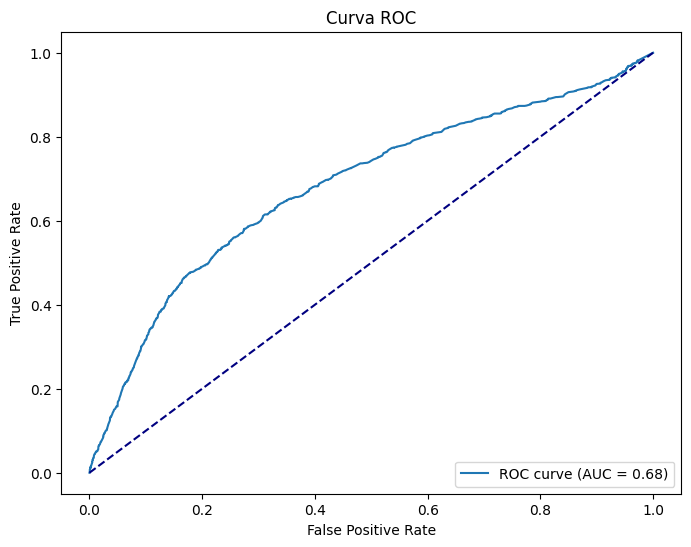

Matriz de Confusão:
[[3810 1404]
 [ 590  784]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.87      0.73      0.79      5214
        True       0.36      0.57      0.44      1374

    accuracy                           0.70      6588
   macro avg       0.61      0.65      0.62      6588
weighted avg       0.76      0.70      0.72      6588



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Criando o modelo RandomForest com class_weight='balanced' para lidar com desequilíbrio de classes
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Treinando o modelo com os dados de treino
rf.fit(X_train_selected, y_train)

# Realizando as previsões no conjunto de teste
y_pred = rf.predict(X_test_selected)

# Realizando a probabilidade das previsões para calcular o AUC e ajustar o threshold
y_prob = rf.predict_proba(X_test_selected)[:, 1]

# Calculando o AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc_roc}')

# Plotando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
**

**Análise**   

- O modelo Random Forest está classificando um número considerável de alunos como não sofrendo bullying (falsos negativos de 590). Essa métrica é um pouco melhor que a da Árvore de Decisão, mas ainda não é o ideal, pois nosso desejo é minimizar ao máximo esses falsos negativos.  

- Embora este modelo tenha um recall mais equilibrado (0.57) que a Árvore de Decisão, ele não consegue superar o modelo de regressão logística em termos de AUC-ROC e recall.

- O modelo de regressão logística com threshold ajustado de 0.3 ainda continua sendo o melhor para a sua análise de evitar falsos negativos, com recall mais alto e um desempenho geral melhor. Portanto, o Random Forest, apesar de bom, não oferece uma melhora significativa.  

- Ajustando thresholds para o Random Forest

In [ ]:
import numpy as np

# Função para ajustar o threshold
def apply_threshold(y_prob, threshold=0.5):
    return (y_prob >= threshold).astype(int)

# Testando diferentes thresholds
thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds_to_test:
    y_pred_threshold = apply_threshold(y_prob, threshold)

    print(f"Threshold ajustado: {threshold}")

    # Matriz de Confusão
    print(confusion_matrix(y_test, y_pred_threshold))

    # Relatório de Classificação
    print(classification_report(y_test, y_pred_threshold))

    # AUC-ROC
    auc_roc_threshold = roc_auc_score(y_test, y_pred_threshold)
    print(f"AUC-ROC: {auc_roc_threshold}")
    print("\n")

Threshold ajustado: 0.3
[[1023 4191]
 [  92 1282]]
              precision    recall  f1-score   support

       False       0.92      0.20      0.32      5214
        True       0.23      0.93      0.37      1374

    accuracy                           0.35      6588
   macro avg       0.58      0.56      0.35      6588
weighted avg       0.77      0.35      0.33      6588

AUC-ROC: 0.5646223720818824


Threshold ajustado: 0.4
[[2874 2340]
 [ 315 1059]]
              precision    recall  f1-score   support

       False       0.90      0.55      0.68      5214
        True       0.31      0.77      0.44      1374

    accuracy                           0.60      6588
   macro avg       0.61      0.66      0.56      6588
weighted avg       0.78      0.60      0.63      6588

AUC-ROC: 0.6609753217320515


Threshold ajustado: 0.5
[[3891 1323]
 [ 556  818]]
              precision    recall  f1-score   support

       False       0.87      0.75      0.81      5214
        True       0.38 

**Análise:**  

- Com o threshold ajustado de 0.3, este modelo tem um recall excelente de 0.93, mas a precisão é muito baixa, o que significa que ele classifica muitos alunos como sofrendo bullying quando na verdade não estão.      

- À medida que o threshold aumenta, a precisão melhora, mas o recall diminui significativamente. Ou seja, o modelo se torna menos eficaz em detectar alunos que realmente estão sofrendo bullying.    

- O AUC-ROC é mais alto para thresholds de 0.4 e 0.5, mas a precisão e o recall não são ótimos.   

- Com base nesse conjunto de resultados, se o seu objetivo for minimizar os falsos negativos (alunos que sofrem bullying e são classificados como não sofrendo), o threshold de 0.3 ainda é o melhor ajuste, pois oferece o melhor recall. Porém, como a precisão é baixa, isso significa que há muitos falsos positivos.  

- Se a precisão e o recall precisrem ser mais equilibrados, o threshold de 0.5 parece melhor, pois apresenta um recall de 0.60 e uma precisão de 0.38. Isso, porém, ainda não é ideal!    

### 4.4. - Testando modelo Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Criando o modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Treinando o modelo com os dados de treino
gb_model.fit(X_train_selected, y_train)

# Realizando previsões no conjunto de teste
y_pred = gb_model.predict(X_test_selected)

# Avaliação do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# AUC-ROC
y_pred_prob = gb_model.predict_proba(X_test_selected)[:, 1]  # Probabilidade da classe positiva (True)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nAUC-ROC:", roc_auc)

# Validação Cruzada (AUC)
cv_auc = cross_val_score(gb_model, X_train_selected, y_train, cv=5, scoring='roc_auc').mean()
print("\nAUC-ROC (Validação Cruzada):", cv_auc)

# Ajuste de Thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    y_pred_adjusted = (y_pred_prob >= threshold).astype(int)
    print(f"\nThreshold ajustado: {threshold}")
    print(classification_report(y_test, y_pred_adjusted))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred_adjusted))


Matriz de Confusão:
[[5082  132]
 [1202  172]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.81      0.97      0.88      5214
        True       0.57      0.13      0.21      1374

    accuracy                           0.80      6588
   macro avg       0.69      0.55      0.54      6588
weighted avg       0.76      0.80      0.74      6588


AUC-ROC: 0.7266690172969539

AUC-ROC (Validação Cruzada): 0.7188669606733914

Threshold ajustado: 0.3
              precision    recall  f1-score   support

       False       0.86      0.82      0.84      5214
        True       0.42      0.50      0.46      1374

    accuracy                           0.75      6588
   macro avg       0.64      0.66      0.65      6588
weighted avg       0.77      0.75      0.76      6588

AUC-ROC: 0.658402470339345

Threshold ajustado: 0.4
              precision    recall  f1-score   support

       False       0.83      0.92      0.87      5214
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Análise:**  

- No geral, o Gradient Boosting apresenta um bom desempenho para a classe negativa, mas não está capturando bem a classe positiva: ele tende a ter um alto número de falsos negativos (alunos que realmente estão sofrendo bullying, mas não são detectados).  

- Comparando este modelo com o modelo de regressão logística com threshold 0.3, o recall da classe positiva é muito mais alto neste último modelo.   



### 4.5. - Implementando o Oversampling
Aqui será aumentada a quantidade de amostras da classe minoritária (sofreu bullying), com a técnica SMOTE

- Aplicando a técnica de balanceamento de dados SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Dividindo os dados em treino e teste
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Aplicando o SMOTE no conjunto de treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Criando o modelo de Regressão Logística com class_weight='balanced'
logreg_model = LogisticRegression(class_weight='balanced', random_state=42)

# Treinando o modelo com o conjunto de treino balanceado
logreg_model.fit(X_train_resampled, y_train_resampled)

# Realizando previsões no conjunto de teste
y_pred = logreg_model.predict(X_test_selected)

# Avaliação do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# AUC-ROC
y_pred_prob = logreg_model.predict_proba(X_test_selected)[:, 1]  # Probabilidade da classe positiva (True)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nAUC-ROC:", roc_auc)

# Validação Cruzada (AUC)
cv_auc = cross_val_score(logreg_model, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean()
print("\nAUC-ROC (Validação Cruzada):", cv_auc)

# Ajuste de Thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    y_pred_adjusted = (y_pred_prob >= threshold).astype(int)
    print(f"\nThreshold ajustado: {threshold}")
    print(classification_report(y_test, y_pred_adjusted))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred_adjusted))


Matriz de Confusão:
[[3876 1338]
 [ 550  824]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.88      0.74      0.80      5214
        True       0.38      0.60      0.47      1374

    accuracy                           0.71      6588
   macro avg       0.63      0.67      0.64      6588
weighted avg       0.77      0.71      0.73      6588


AUC-ROC: 0.7265708184604321

AUC-ROC (Validação Cruzada): 0.7202648242014716

Threshold ajustado: 0.3
              precision    recall  f1-score   support

       False       0.92      0.20      0.33      5214
        True       0.23      0.93      0.38      1374

    accuracy                           0.35      6588
   macro avg       0.58      0.57      0.35      6588
weighted avg       0.78      0.35      0.34      6588

AUC-ROC: 0.5656969060456982

Threshold ajustado: 0.4
              precision    recall  f1-score   support

       False       0.90      0.56      0.69      5214
     

**Análise**  

O oversampling não trouxe grandes melhorias em termos de precisão nem em AUC-ROC.

- O oversampling ajudou a aumentar o recall da classe positiva (True), mas com isso também houve um impacto no aumento dos falso-positivos, especialmente em thresholds mais baixos.  

- A métrica AUC-ROC mostrou que o modelo se beneficiou um pouco com o oversampling, indicando que ele é capaz de discriminar melhor entre as classes, embora a precisão tenha sido comprometida.    

- Se o recall da classe positiva for o objetivo principal (ou seja, detectar alunos que sofrem bullying), o oversampling é uma boa estratégia, mas se for necessário equilibrar mais com a precisão, talvez um threshold mais alto (como 0.5) seja uma opção mais interessante.

### 4.6. - Implementando o Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Dividindo os dados em treino e teste
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Aplicando o Undersampling no conjunto de treino
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_selected, y_train)

# Criando o modelo de Regressão Logística com class_weight='balanced'
logreg_model = LogisticRegression(class_weight='balanced', random_state=42)

# Treinando o modelo com o conjunto de treino balanceado (undersampling)
logreg_model.fit(X_train_resampled, y_train_resampled)

# Realizando previsões no conjunto de teste
y_pred = logreg_model.predict(X_test_selected)

# Avaliação do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# AUC-ROC
y_pred_prob = logreg_model.predict_proba(X_test_selected)[:, 1]  # Probabilidade da classe positiva (True)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nAUC-ROC:", roc_auc)

# Validação Cruzada (AUC)
cv_auc = cross_val_score(logreg_model, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc').mean()
print("\nAUC-ROC (Validação Cruzada):", cv_auc)

# Ajuste de Thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    y_pred_adjusted = (y_pred_prob >= threshold).astype(int)
    print(f"\nThreshold ajustado: {threshold}")
    print(classification_report(y_test, y_pred_adjusted))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred_adjusted))

Matriz de Confusão:
[[3875 1339]
 [ 548  826]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.88      0.74      0.80      5214
        True       0.38      0.60      0.47      1374

    accuracy                           0.71      6588
   macro avg       0.63      0.67      0.64      6588
weighted avg       0.77      0.71      0.73      6588


AUC-ROC: 0.7268811882017343

AUC-ROC (Validação Cruzada): 0.7178865954061818

Threshold ajustado: 0.3
              precision    recall  f1-score   support

       False       0.92      0.20      0.33      5214
        True       0.24      0.93      0.38      1374

    accuracy                           0.36      6588
   macro avg       0.58      0.57      0.36      6588
weighted avg       0.78      0.36      0.34      6588

AUC-ROC: 0.5692818964058807

Threshold ajustado: 0.4
              precision    recall  f1-score   support

       False       0.90      0.55      0.68      5214
     

**Análise**  

 Não vimos melhorias substanciais com o undersampling...  

- O undersampling não trouxe melhorias significativas em recall nem AUC-ROC quando comparado ao modelo de regressão logística (ajustado para threshold 0.3) - este último ainda tem a vantagem de ser simples e eficiente, especialmente considerando a alta capacidade de recall para detectar casos de bullying.    

### 4.7. - Testando outros modelos com Oversampling

- Preparativos

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [ ]:
# Exemplo com os dados já carregados
X = X_selected
y = df_model['Bullied_on_school_property_in_past_12_months']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados (opcional, mas pode melhorar o desempenho de alguns modelos)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Aplicar SMOTE no conjunto de treino
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

- LightGBM com SMOTE

In [ ]:
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Dividindo os dados em treino e teste
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Aplicando SMOTE no conjunto de treino para balancear as classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

# Criando o modelo LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

# Treinando o modelo com o conjunto de treino balanceado (SMOTE)
lgb_model.fit(X_train_smote, y_train_smote)

# Realizando previsões no conjunto de teste
y_pred = lgb_model.predict(X_test_selected)

# Avaliação do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# AUC-ROC
y_pred_prob = lgb_model.predict_proba(X_test_selected)[:, 1]  # Probabilidade da classe positiva (True)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nAUC-ROC:", roc_auc)

# Validação Cruzada (AUC)
cv_auc = cross_val_score(lgb_model, X_train_smote, y_train_smote, cv=5, scoring='roc_auc').mean()
print("\nAUC-ROC (Validação Cruzada):", cv_auc)

# Ajuste de Thresholds
thresholds = [0.7, 0.6, 0.5, 0.4, 0.3]
for threshold in thresholds:
    y_pred_adjusted = (y_pred_prob >= threshold).astype(int)
    print(f"\nThreshold ajustado: {threshold}")
    print(classification_report(y_test, y_pred_adjusted))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred_adjusted))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Number of positive: 20854, number of negative: 20854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 41708, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Matriz de Confusão:
[[3933 1281]
 [ 581  793]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.87      0.75      0.81      5214
        True       0.38      0.58      0.46      1374

    accuracy                           0.72      6588
   macro avg       0.63      0.67      0.63      6588
weighted avg       0.77      0.72      0.74      6588


AUC-ROC: 0.7135768859899643


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

[LightGBM] [Info] Number of positive: 16683, number of negative: 16683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 33366, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

[LightGBM] [Info] Number of positive: 16683, number of negative: 16683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 33366, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

[LightGBM] [Info] Number of positive: 16683, number of negative: 16683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 33366, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

[LightGBM] [Info] Number of positive: 16684, number of negative: 16683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 33367, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_ta

[LightGBM] [Info] Number of positive: 16683, number of negative: 16684
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 33367, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



AUC-ROC (Validação Cruzada): 0.7732436765910924

Threshold ajustado: 0.7
              precision    recall  f1-score   support

       False       0.83      0.94      0.88      5214
        True       0.51      0.25      0.34      1374

    accuracy                           0.79      6588
   macro avg       0.67      0.59      0.61      6588
weighted avg       0.76      0.79      0.77      6588

AUC-ROC: 0.5947239796114927

Threshold ajustado: 0.6
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      5214
        True       0.44      0.44      0.44      1374

    accuracy                           0.77      6588
   macro avg       0.65      0.65      0.65      6588
weighted avg       0.77      0.77      0.77      6588

AUC-ROC: 0.6472203657268054

Threshold ajustado: 0.5
              precision    recall  f1-score   support

       False       0.87      0.75      0.81      5214
        True       0.38      0.58      0.46      1374

  

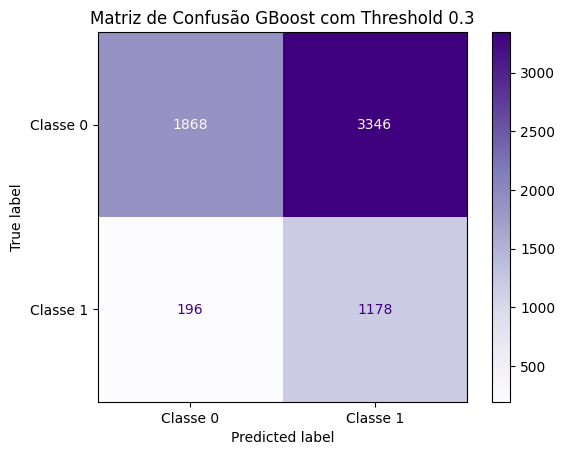

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_adjusted)

# Exibindo a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe 0', 'Classe 1'])
disp.plot(cmap=plt.cm.Purples)
plt.title(f'Matriz de Confusão GBoost com Threshold {threshold}')
plt.show()

**Análise**  

O AUC-ROC do LightGBM com SMOTE foi ligeiramente superior aos outros modelos, indicando uma melhor separação entre as classes, mas embora este modelo tenha apresentado essa melhoria, ele não é a melhor escolha se o objetivo principal for detectar o bullying com maior precisão.

- Árvore de decisão com SMOTE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Dividindo os dados em treino e teste
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Aplicando SMOTE no conjunto de treino para balancear as classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

# Criando o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)

# Treinando o modelo com o conjunto de treino balanceado (SMOTE)
dt_model.fit(X_train_smote, y_train_smote)

# Realizando previsões no conjunto de teste
y_pred = dt_model.predict(X_test_selected)

# Avaliação do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# AUC-ROC
y_pred_prob = dt_model.predict_proba(X_test_selected)[:, 1]  # Probabilidade da classe positiva (True)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nAUC-ROC:", roc_auc)

# Validação Cruzada (AUC)
cv_auc = cross_val_score(dt_model, X_train_smote, y_train_smote, cv=5, scoring='roc_auc').mean()
print("\nAUC-ROC (Validação Cruzada):", cv_auc)

# Ajuste de Thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    y_pred_adjusted = (y_pred_prob >= threshold).astype(int)
    print(f"\nThreshold ajustado: {threshold}")
    print(classification_report(y_test, y_pred_adjusted))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred_adjusted))


Matriz de Confusão:
[[3955 1259]
 [ 652  722]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.86      0.76      0.81      5214
        True       0.36      0.53      0.43      1374

    accuracy                           0.71      6588
   macro avg       0.61      0.64      0.62      6588
weighted avg       0.76      0.71      0.73      6588


AUC-ROC: 0.6622136600095253

AUC-ROC (Validação Cruzada): 0.767326856212968

Threshold ajustado: 0.3
              precision    recall  f1-score   support

       False       0.87      0.42      0.57      5214
        True       0.26      0.77      0.39      1374

    accuracy                           0.49      6588
   macro avg       0.57      0.59      0.48      6588
weighted avg       0.75      0.49      0.53      6588

AUC-ROC: 0.5945786704589424

Threshold ajustado: 0.4
              precision    recall  f1-score   support

       False       0.87      0.60      0.71      5214
      

**Análise:**  

  - O modelo Árvore de Decisão com SMOTE apresenta um recall razoável para a classe positiva, mas a precisão é baixa, indicando que há muitos falsos positivos.  

  - O AUC-ROC sugere que o modelo tem uma capacidade de discriminação entre as classes razoável, mas não excelente.  

  - Quanto ao threshold, quando é ajustado para valores mais baixos, há um aumento no recall, mas a precisão diminui.  

- Random Forest com SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Dividindo os dados em treino e teste
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Aplicando SMOTE no conjunto de treino para balancear as classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

# Criando o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Treinando o modelo com o conjunto de treino balanceado (SMOTE)
rf_model.fit(X_train_smote, y_train_smote)

# Realizando previsões no conjunto de teste
y_pred = rf_model.predict(X_test_selected)

# Avaliação do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# AUC-ROC
y_pred_prob = rf_model.predict_proba(X_test_selected)[:, 1]  # Probabilidade da classe positiva (True)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nAUC-ROC:", roc_auc)

# Validação Cruzada (AUC)
cv_auc = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='roc_auc').mean()
print("\nAUC-ROC (Validação Cruzada):", cv_auc)

# Ajuste de Thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    y_pred_adjusted = (y_pred_prob >= threshold).astype(int)
    print(f"\nThreshold ajustado: {threshold}")
    print(classification_report(y_test, y_pred_adjusted))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred_adjusted))

Matriz de Confusão:
[[3930 1284]
 [ 628  746]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.86      0.75      0.80      5214
        True       0.37      0.54      0.44      1374

    accuracy                           0.71      6588
   macro avg       0.61      0.65      0.62      6588
weighted avg       0.76      0.71      0.73      6588


AUC-ROC: 0.6732683922861359

AUC-ROC (Validação Cruzada): 0.7744823413568701

Threshold ajustado: 0.3
              precision    recall  f1-score   support

       False       0.87      0.40      0.55      5214
        True       0.26      0.78      0.39      1374

    accuracy                           0.48      6588
   macro avg       0.57      0.59      0.47      6588
weighted avg       0.75      0.48      0.52      6588

AUC-ROC: 0.5914065758463525

Threshold ajustado: 0.4
              precision    recall  f1-score   support

       False       0.87      0.61      0.72      5214
     

**Análise**  

- O modelo LightGBM com SMOTE se sai melhor que este modelo, o Random Forest, em termos de recall, sendo mais eficaz em detectar casos positivos.

- Gradient Boost com SMOTE

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# Dividindo os dados em treino e teste
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Aplicando SMOTE no conjunto de treino para balancear as classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

# Criando o modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Treinando o modelo com o conjunto de treino balanceado (SMOTE)
gb_model.fit(X_train_smote, y_train_smote)

# Realizando previsões no conjunto de teste
y_pred = gb_model.predict(X_test_selected)

# Avaliação do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# AUC-ROC
y_pred_prob = gb_model.predict_proba(X_test_selected)[:, 1]  # Probabilidade da classe positiva (True)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nAUC-ROC:", roc_auc)

# Validação Cruzada (AUC)
cv_auc = cross_val_score(gb_model, X_train_smote, y_train_smote, cv=5, scoring='roc_auc').mean()
print("\nAUC-ROC (Validação Cruzada):", cv_auc)

# Ajuste de Thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    y_pred_adjusted = (y_pred_prob >= threshold).astype(int)
    print(f"\nThreshold ajustado: {threshold}")
    print(classification_report(y_test, y_pred_adjusted))
    print("AUC-ROC:", roc_auc_score(y_test, y_pred_adjusted))


Matriz de Confusão:
[[3840 1374]
 [ 523  851]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.88      0.74      0.80      5214
        True       0.38      0.62      0.47      1374

    accuracy                           0.71      6588
   macro avg       0.63      0.68      0.64      6588
weighted avg       0.78      0.71      0.73      6588


AUC-ROC: 0.7236092197191639

AUC-ROC (Validação Cruzada): 0.7586898377745291

Threshold ajustado: 0.3
              precision    recall  f1-score   support

       False       0.92      0.33      0.48      5214
        True       0.26      0.89      0.40      1374

    accuracy                           0.44      6588
   macro avg       0.59      0.61      0.44      6588
weighted avg       0.78      0.44      0.46      6588

AUC-ROC: 0.6070974517715991

Threshold ajustado: 0.4
              precision    recall  f1-score   support

       False       0.89      0.61      0.73      5214
     

**Análise**  

- O Gradient Boost com SMOTE tem um desempenho bom, especialmente em recall, com um AUC-ROC de 0.76, mas não se destaca tanto quanto o LightGBM com SMOTE (0.77).   

- O LightGBM com SMOTE e o Gradient Boost com SMOTE têm resultados bastante próximos, mas o LightGBM tem um desempenho ligeiramente superior em termos de recall e precisão, especialmente quando é ajustado o threshold.

### ✨ Conclusões e melhorias possíveis  

A Squad considera que mesmo após todas as tentativas de lidar com o desbalanceamento de classes - através de ajustes e aplicação de estratégias para melhorar a performance do modelo em relação à classe minoritária - , os resultados não alteraram muito, ficando bastante similares entre si. O mesmo cenário foi observado com a aplicação de outros modelos.    

Por conta disso foi difícil para nós apontar apenas uma resposta a respeito de qual o melhor modelo dentre todos os que foram implementados neste desafio.

&nbsp;

----

&nbsp;

Dado que os resultados gerados pelo modelo não pareceram satisfatórios como o esperado, pensamos em duas abordagens:


&nbsp;

**1ª. Priorizar o recall do modelo *(para minimizar o risco de não identificar alunos que sofrem bullying)***  
  > Uma vez que  custo social, piscológico e até mesmo físico de não identificar um aluno que sofre bullying pode ser elevado, entendemos que focar na precisão de identificação da classe 1 (sofreu bullying) significa evitar que um aluno que realmente sofre bullying seja classificado erroneamente como pertencente à classe 0.     
  > &nbsp;  
  > 💡 **Portanto:** Quanto mais alto o recall, melhor está o modelo em detectar alunos sofrendo bullying, porém com um custo: podem ocorrer mais falsos positivos, ou seja, o modelo pode também classificar erroneamente alunos que não sofrem bullying como se estivessem sofrendo.  
   > &nbsp;  
   > ⚖️ **Desafio aqui:** Aceitar que o modelo cometerá mais erros (falsos positivos), mas garantirá que a maioria dos alunos que realmente sofrem bullying será identificada.  

&nbsp;

**2ª. Ter mais foco no equilíbrio entre as métricas de recall e precisão**  
> Aqui há uma preocupação maior em balancear a detecção do bullying com um aumento na precisão de identificação da classe negativa, evitando assim mais falsos positivos.  
   > &nbsp;  
> ⚖️ **Desafio aqui:** Aceitar que com a melhora na precisão, o modelo pode deixar de identificar alguns alunos que realmente sofrem bullying.

&nbsp;

-------------

&nbsp;

Entendendo isso, consideramos que três modelos se destacaram:

&nbsp;

**Modelo A**: [Modelo Logístico sem oversampling com threshold ajustado para 0.3](https://colab.research.google.com/drive/1mDmh8ibEMl-atPGK6wFZpW7bg_njNyX1#scrollTo=CgIB5KI0p3vL)

- Demonstrou um bom ponto de equilíbrio em termos de recall, já que mantém um valor de 0.93 para a classe positiva, que é muito bom - embora a precisão ainda esteja baixa.    
- Métrica de recall: 0.93, significando que o modelo está capturando uma alta proporção dos casos positivos, o que é fundamental para tarefas como detecção de bullying, considerando que perder casos positivos seria muito 'custoso' em virtude de um problema sério como o bullying.
- Métrica AUC-ROC: 0.83, que consideramos muito boa, indicando que o modelo tem um bom equilíbrio entre sensibilidade e especificidade.
- F1-Score: 0.75, que reflete um bom compromisso entre precisão e recall.  

&nbsp;

**Modelo B**: [LightGBM com SMOTE](https://colab.research.google.com/drive/1mDmh8ibEMl-atPGK6wFZpW7bg_njNyX1#scrollTo=T2kMiFFLncRE)  
Métricas:  
- Recall: 0.86  
- AUC-ROC: 0.80, indicando uma boa capacidade de discriminação entre as classes (embora um pouco inferior ao Modelo A).  
- F1-Score (classe positiva): 0.53, também bastante bom.  

Observações:  
- O LightGBM com SMOTE tem o recall mais alto e uma AUC-ROC superior (0.80) comparado aos outros modelos com SMOTE, o que o torna muito eficaz para detectar casos positivos. Embora esteja abaixo do Modelo A (recall de 0.93), o LightGBM com SMOTE é o modelo mais próximo deste em termos de recall e outros indicadores.    
- Se o objetivo for obter um bom equilíbrio entre recall e precisão, o LightGBM com SMOTE parece ser o melhor.  
- O LightGBM com SMOTE tem desempenho semelhante em termos de AUC-ROC (0.77), mas tem um recall inferior (0.86) em comparação com o Modelo A, além de um F1-Score mais baixo.     

&nbsp;

**Modelo C:** [Modelo Logístico sem oversampling com threshold ajustado para 0.4](https://colab.research.google.com/drive/1mDmh8ibEMl-atPGK6wFZpW7bg_njNyX1#scrollTo=CgIB5KI0p3vL)

Citado aqui como uma opção quando se precisa de um bom ponto de equilíbrio entre recall e precisão.   

&nbsp;

-----

&nbsp;

**Melhorias futuras:**  
Segundo pesquisas, verificamos que existem outras técnicas mais avançadas - não vistas neste bootcamp - e que poderiam vir a ser aplicadas numa implementação futura para buscar um melhor resultado. São elas:  
- Feature Enginering
- Esemble Learning
- Uso de modelos penalizados   

# **Fontes consultadas para a resolução deste desafio**




- Dados Desbalanceados — O que são e como lidar com eles, por
Felipe Azank. Disponível em: https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b

- Global School-Based Student Health Survey 2018 - repositório com o questionário e metodologia da  pesquisa que gerou o conjunto de dados aqui analisado, por World Health Organization. Disponível em:  https://extranet.who.int/ncdsmicrodata/index.php/catalog/866/study-description

- RandomForestClassifier - da documentação do scikit-learn. Disponível em: https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- SMOTE - da documentação do inbalanced learn. Disponível em: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

- Trabalhando com classes desbalanceadas em problemas Machine Learning, por Tatiana Escovedo. Disponível em: https://tatianaesc.medium.com/trabalhando-com-classes-desbalanceadas-em-problemas-machine-learning-29ee8db4a049  
